In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline

In [3]:
import seaborn as sn
import plotly.express as px

# Part1: Create the dataframes and add neccessary information for furthur use

#### Step1: create a dataframe that contains all data from 2001 to 2021

In [4]:
ur_files = ddf.read_csv("Daily_PM2.5_2001-2021/PM2.5_*.csv", dtype={'CBSA_CODE': 'float64'})
df_total = ur_files.compute()
df_total.head()

Date Source   Site ID  POC  Daily Mean PM2.5 Concentration     UNITS  \
0   1/1/2001    AQS  10030010    1                             9.1  ug/m3 LC   
1   1/4/2001    AQS  10030010    1                             5.5  ug/m3 LC   
2   1/7/2001    AQS  10030010    1                            12.4  ug/m3 LC   
3  1/10/2001    AQS  10030010    1                            12.8  ug/m3 LC   
4  1/19/2001    AQS  10030010    1                             4.1  ug/m3 LC   

   DAILY_AQI_VALUE          Site Name  DAILY_OBS_COUNT  PERCENT_COMPLETE  \
0               38  FAIRHOPE, Alabama                1               100   
1               23  FAIRHOPE, Alabama                1               100   
2               52  FAIRHOPE, Alabama                1               100   
3               52  FAIRHOPE, Alabama                1               100   
4               17  FAIRHOPE, Alabama                1               100   

   AQS_PARAMETER_CODE        AQS_PARAMETER_DESC  CBSA_CODE  \
0               88101  PM2.5 - Local Conditions    19300.0   
1               88101  PM2.5 - Local Conditions    19300.0   
2               88101  PM2.5 - Local Conditions    19300.0   
3               88101  PM2.5 - Local Conditions    19300.0   
4               88101  PM2.5 - Local Conditions    19300.0   

                   CBSA_NAME  STATE_CODE    STATE  COUNTY_CODE   COUNTY  \
0  Daphne-Fairhope-Foley, AL           1  Alabama            3  Baldwin   
1  Daphne-Fairhope-Foley, AL           1  Alabama            3  Baldwin   
2  Daphne-Fairhope-Foley, AL           1  Alabama            3  Baldwin   
3  Daphne-Fairhope-Foley, AL           1  Alabama            3  Baldwin   
4  Daphne-Fairhope-Foley, AL           1  Alabama            3  Baldwin   

   SITE_LATITUDE  SITE_LONGITUDE  
0      30.497478      -87.880258  
1      30.497478      -87.880258  
2      30.497478      -87.880258  
3      30.497478      -87.880258  
4      30.497478      -87.880258

#### Step2: add year, month, season, and region information to the dataframe

In [5]:
df_total

Date  Source    Site ID  POC  Daily Mean PM2.5 Concentration  \
0       1/1/2001     AQS   10030010    1                             9.1   
1       1/4/2001     AQS   10030010    1                             5.5   
2       1/7/2001     AQS   10030010    1                            12.4   
3      1/10/2001     AQS   10030010    1                            12.8   
4      1/19/2001     AQS   10030010    1                             4.1   
...          ...     ...        ...  ...                             ...   
92771  9/16/2021  AirNow  560391013    1                             5.7   
92772  9/17/2021  AirNow  560391013    1                             5.9   
92773  9/18/2021  AirNow  560391013    1                             8.8   
92774  9/19/2021  AirNow  560391013    1                             3.5   
92775  9/20/2021  AirNow  560391013    1                             0.9   

          UNITS  DAILY_AQI_VALUE  \
0      ug/m3 LC               38   
1      ug/m3 LC               23   
2      ug/m3 LC               52   
3      ug/m3 LC               52   
4      ug/m3 LC               17   
...         ...              ...   
92771  ug/m3 LC               24   
92772  ug/m3 LC               25   
92773  ug/m3 LC               37   
92774  ug/m3 LC               15   
92775  ug/m3 LC                4   

                                               Site Name  DAILY_OBS_COUNT  \
0                                      FAIRHOPE, Alabama                1   
1                                      FAIRHOPE, Alabama                1   
2                                      FAIRHOPE, Alabama                1   
3                                      FAIRHOPE, Alabama                1   
4                                      FAIRHOPE, Alabama                1   
...                                                  ...              ...   
92771  Yellowstone National Park - Old Faithful Snow ...                1   
92772  Yellowstone National Park - Old Faithful Snow ...                1   
92773  Yellowstone National Park - Old Faithful Snow ...                1   
92774  Yellowstone National Park - Old Faithful Snow ...                1   
92775  Yellowstone National Park - Old Faithful Snow ...                1   

       PERCENT_COMPLETE  AQS_PARAMETER_CODE        AQS_PARAMETER_DESC  \
0                   100               88101  PM2.5 - Local Conditions   
1                   100               88101  PM2.5 - Local Conditions   
2                   100               88101  PM2.5 - Local Conditions   
3                   100               88101  PM2.5 - Local Conditions   
4                   100               88101  PM2.5 - Local Conditions   
...                 ...                 ...                       ...   
92771               100               88101  PM2.5 - Local Conditions   
92772               100               88101  PM2.5 - Local Conditions   
92773               100               88101  PM2.5 - Local Conditions   
92774               100               88101  PM2.5 - Local Conditions   
92775               100               88101  PM2.5 - Local Conditions   

       CBSA_CODE                  CBSA_NAME  STATE_CODE    STATE  COUNTY_CODE  \
0        19300.0  Daphne-Fairhope-Foley, AL           1  Alabama            3   
1        19300.0  Daphne-Fairhope-Foley, AL           1  Alabama            3   
2        19300.0  Daphne-Fairhope-Foley, AL           1  Alabama            3   
3        19300.0  Daphne-Fairhope-Foley, AL           1  Alabama            3   
4        19300.0  Daphne-Fairhope-Foley, AL           1  Alabama            3   
...          ...                        ...         ...      ...          ...   
92771    27220.0             Jackson, WY-ID          56  Wyoming           39   
92772    27220.0             Jackson, WY-ID          56  Wyoming           39   
92773    27220.0             Jackson, WY-ID          56  Wyoming           39   
92774    27220.0             Jackson, WY-ID          5

In [6]:
import datetime

In [7]:
df_total['Date'] = pd.to_datetime(df_total['Date'])
df_total.head()

Date Source   Site ID  POC  Daily Mean PM2.5 Concentration     UNITS  \
0 2001-01-01    AQS  10030010    1                             9.1  ug/m3 LC   
1 2001-01-04    AQS  10030010    1                             5.5  ug/m3 LC   
2 2001-01-07    AQS  10030010    1                            12.4  ug/m3 LC   
3 2001-01-10    AQS  10030010    1                            12.8  ug/m3 LC   
4 2001-01-19    AQS  10030010    1                             4.1  ug/m3 LC   

   DAILY_AQI_VALUE          Site Name  DAILY_OBS_COUNT  PERCENT_COMPLETE  \
0               38  FAIRHOPE, Alabama                1               100   
1               23  FAIRHOPE, Alabama                1               100   
2               52  FAIRHOPE, Alabama                1               100   
3               52  FAIRHOPE, Alabama                1               100   
4               17  FAIRHOPE, Alabama                1               100   

   AQS_PARAMETER_CODE        AQS_PARAMETER_DESC  CBSA_CODE  \
0               88101  PM2.5 - Local Conditions    19300.0   
1               88101  PM2.5 - Local Conditions    19300.0   
2               88101  PM2.5 - Local Conditions    19300.0   
3               88101  PM2.5 - Local Conditions    19300.0   
4               88101  PM2.5 - Local Conditions    19300.0   

                   CBSA_NAME  STATE_CODE    STATE  COUNTY_CODE   COUNTY  \
0  Daphne-Fairhope-Foley, AL           1  Alabama            3  Baldwin   
1  Daphne-Fairhope-Foley, AL           1  Alabama            3  Baldwin   
2  Daphne-Fairhope-Foley, AL           1  Alabama            3  Baldwin   
3  Daphne-Fairhope-Foley, AL           1  Alabama            3  Baldwin   
4  Daphne-Fairhope-Foley, AL           1  Alabama            3  Baldwin   

   SITE_LATITUDE  SITE_LONGITUDE  
0      30.497478      -87.880258  
1      30.497478      -87.880258  
2      30.497478      -87.880258  
3      30.497478      -87.880258  
4      30.497478      -87.880258

In [8]:
df_total['Year'] = df_total['Date'].dt.year
df_total.head()

Date Source   Site ID  POC  Daily Mean PM2.5 Concentration     UNITS  \
0 2001-01-01    AQS  10030010    1                             9.1  ug/m3 LC   
1 2001-01-04    AQS  10030010    1                             5.5  ug/m3 LC   
2 2001-01-07    AQS  10030010    1                            12.4  ug/m3 LC   
3 2001-01-10    AQS  10030010    1                            12.8  ug/m3 LC   
4 2001-01-19    AQS  10030010    1                             4.1  ug/m3 LC   

   DAILY_AQI_VALUE          Site Name  DAILY_OBS_COUNT  PERCENT_COMPLETE  ...  \
0               38  FAIRHOPE, Alabama                1               100  ...   
1               23  FAIRHOPE, Alabama                1               100  ...   
2               52  FAIRHOPE, Alabama                1               100  ...   
3               52  FAIRHOPE, Alabama                1               100  ...   
4               17  FAIRHOPE, Alabama                1               100  ...   

         AQS_PARAMETER_DESC CBSA_CODE                  CBSA_NAME STATE_CODE  \
0  PM2.5 - Local Conditions   19300.0  Daphne-Fairhope-Foley, AL          1   
1  PM2.5 - Local Conditions   19300.0  Daphne-Fairhope-Foley, AL          1   
2  PM2.5 - Local Conditions   19300.0  Daphne-Fairhope-Foley, AL          1   
3  PM2.5 - Local Conditions   19300.0  Daphne-Fairhope-Foley, AL          1   
4  PM2.5 - Local Conditions   19300.0  Daphne-Fairhope-Foley, AL          1   

     STATE COUNTY_CODE   COUNTY SITE_LATITUDE  SITE_LONGITUDE  Year  
0  Alabama           3  Baldwin     30.497478      -87.880258  2001  
1  Alabama           3  Baldwin     30.497478      -87.880258  2001  
2  Alabama           3  Baldwin     30.497478      -87.880258  2001  
3  Alabama           3  Baldwin     30.497478      -87.880258  2001  
4  Alabama           3  Baldwin     30.497478      -87.880258  2001  

[5 rows x 21 columns]

In [9]:
# Defining a function to get month
def getMonth(date):
    return(date.strftime('%b'))

In [10]:
df_total['Month'] = df_total['Date'].apply(getMonth)
df_total.head()

Date Source   Site ID  POC  Daily Mean PM2.5 Concentration     UNITS  \
0 2001-01-01    AQS  10030010    1                             9.1  ug/m3 LC   
1 2001-01-04    AQS  10030010    1                             5.5  ug/m3 LC   
2 2001-01-07    AQS  10030010    1                            12.4  ug/m3 LC   
3 2001-01-10    AQS  10030010    1                            12.8  ug/m3 LC   
4 2001-01-19    AQS  10030010    1                             4.1  ug/m3 LC   

   DAILY_AQI_VALUE          Site Name  DAILY_OBS_COUNT  PERCENT_COMPLETE  ...  \
0               38  FAIRHOPE, Alabama                1               100  ...   
1               23  FAIRHOPE, Alabama                1               100  ...   
2               52  FAIRHOPE, Alabama                1               100  ...   
3               52  FAIRHOPE, Alabama                1               100  ...   
4               17  FAIRHOPE, Alabama                1               100  ...   

   CBSA_CODE                  CBSA_NAME  STATE_CODE    STATE  COUNTY_CODE  \
0    19300.0  Daphne-Fairhope-Foley, AL           1  Alabama            3   
1    19300.0  Daphne-Fairhope-Foley, AL           1  Alabama            3   
2    19300.0  Daphne-Fairhope-Foley, AL           1  Alabama            3   
3    19300.0  Daphne-Fairhope-Foley, AL           1  Alabama            3   
4    19300.0  Daphne-Fairhope-Foley, AL           1  Alabama            3   

    COUNTY  SITE_LATITUDE SITE_LONGITUDE  Year  Month  
0  Baldwin      30.497478     -87.880258  2001    Jan  
1  Baldwin      30.497478     -87.880258  2001    Jan  
2  Baldwin      30.497478     -87.880258  2001    Jan  
3  Baldwin      30.497478     -87.880258  2001    Jan  
4  Baldwin      30.497478     -87.880258  2001    Jan  

[5 rows x 22 columns]

In [11]:
# Defining a function to get season
def getSeason(month):
    season = {'spring': ['Mar', 'Apr', 'May'],
               'summer': ['Jun', 'Jul', 'Aug'],
               'autumn': ['Sep', 'Oct', 'Nov']}
    if month in season['spring']:
        return 'Spring'
    elif month in season['summer']:
        return 'Summer'
    elif month in season['autumn']:
        return 'Autumn'
    else:
        return 'Winter'

In [12]:
df_total['Season'] = df_total['Month'].apply(getSeason)
df_total.head()

Date Source   Site ID  POC  Daily Mean PM2.5 Concentration     UNITS  \
0 2001-01-01    AQS  10030010    1                             9.1  ug/m3 LC   
1 2001-01-04    AQS  10030010    1                             5.5  ug/m3 LC   
2 2001-01-07    AQS  10030010    1                            12.4  ug/m3 LC   
3 2001-01-10    AQS  10030010    1                            12.8  ug/m3 LC   
4 2001-01-19    AQS  10030010    1                             4.1  ug/m3 LC   

   DAILY_AQI_VALUE          Site Name  DAILY_OBS_COUNT  PERCENT_COMPLETE  ...  \
0               38  FAIRHOPE, Alabama                1               100  ...   
1               23  FAIRHOPE, Alabama                1               100  ...   
2               52  FAIRHOPE, Alabama                1               100  ...   
3               52  FAIRHOPE, Alabama                1               100  ...   
4               17  FAIRHOPE, Alabama                1               100  ...   

                   CBSA_NAME STATE_CODE    STATE COUNTY_CODE   COUNTY  \
0  Daphne-Fairhope-Foley, AL          1  Alabama           3  Baldwin   
1  Daphne-Fairhope-Foley, AL          1  Alabama           3  Baldwin   
2  Daphne-Fairhope-Foley, AL          1  Alabama           3  Baldwin   
3  Daphne-Fairhope-Foley, AL          1  Alabama           3  Baldwin   
4  Daphne-Fairhope-Foley, AL          1  Alabama           3  Baldwin   

  SITE_LATITUDE  SITE_LONGITUDE  Year  Month  Season  
0     30.497478      -87.880258  2001    Jan  Winter  
1     30.497478      -87.880258  2001    Jan  Winter  
2     30.497478      -87.880258  2001    Jan  Winter  
3     30.497478      -87.880258  2001    Jan  Winter  
4     30.497478      -87.880258  2001    Jan  Winter  

[5 rows x 23 columns]

In [13]:
west_states = ['Colorado', 'Wyoming', 'Montana', 'Idaho', 'Washington',
              'Oregon', 'Utah', 'Nevada', 'California', 'Alaska', 'Hawaii']
Midwest_states = ['Ohio', 'Indiana', 'Michigan', 'Illinois', 'Missouri', 
                  'Wisconsin', 'Minnesota', 'Iowa', 'Kansas', 'Nebraska', 'South Dakota', 'North Dakota']
Southwest_states = ['Texas', 'Oklahoma', 'New Mexico', 'Arizona']
Southeast_states = ['West Virginia', 'Virginia', 'Kentucky', 'Tennessee', 'North Carolina', 
                    'South Carolina', 'Georgia', 'Alabama', 'Mississippi', 'Arkansas', 'Louisiana', 'Florida']
Northeast_states = ['Maine', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New Hampshire', 'Vermont', 
                    'New York', 'Pennsylvania', 'New Jersey', 'Delaware', 'Maryland']

In [14]:
#use a function to get region information
def get_region(state):
    if state in west_states:
        return 'West'
    elif state in Midwest_states:
        return 'Midwest'
    elif state in Southwest_states:
        return 'Southwest'
    elif state in Southeast_states:
        return 'Southeast'
    else:
        return 'Northeast'

In [15]:
df_total['Region'] = df_total['STATE'].apply(get_region)
df_total.head()

Date Source   Site ID  POC  Daily Mean PM2.5 Concentration     UNITS  \
0 2001-01-01    AQS  10030010    1                             9.1  ug/m3 LC   
1 2001-01-04    AQS  10030010    1                             5.5  ug/m3 LC   
2 2001-01-07    AQS  10030010    1                            12.4  ug/m3 LC   
3 2001-01-10    AQS  10030010    1                            12.8  ug/m3 LC   
4 2001-01-19    AQS  10030010    1                             4.1  ug/m3 LC   

   DAILY_AQI_VALUE          Site Name  DAILY_OBS_COUNT  PERCENT_COMPLETE  ...  \
0               38  FAIRHOPE, Alabama                1               100  ...   
1               23  FAIRHOPE, Alabama                1               100  ...   
2               52  FAIRHOPE, Alabama                1               100  ...   
3               52  FAIRHOPE, Alabama                1               100  ...   
4               17  FAIRHOPE, Alabama                1               100  ...   

   STATE_CODE    STATE  COUNTY_CODE   COUNTY  SITE_LATITUDE SITE_LONGITUDE  \
0           1  Alabama            3  Baldwin      30.497478     -87.880258   
1           1  Alabama            3  Baldwin      30.497478     -87.880258   
2           1  Alabama            3  Baldwin      30.497478     -87.880258   
3           1  Alabama            3  Baldwin      30.497478     -87.880258   
4           1  Alabama            3  Baldwin      30.497478     -87.880258   

   Year Month  Season     Region  
0  2001   Jan  Winter  Southeast  
1  2001   Jan  Winter  Southeast  
2  2001   Jan  Winter  Southeast  
3  2001   Jan  Winter  Southeast  
4  2001   Jan  Winter  Southeast  

[5 rows x 24 columns]

#### Step3: Divide the dataframe into 5 smaller dataframes according to the region information

In [16]:
df_W = df_total.loc[df_total['Region'] == 'West']
df_SW = df_total.loc[df_total['Region'] == 'Southwest']
df_SE = df_total.loc[df_total['Region'] == 'Southeast']
df_NE = df_total.loc[df_total['Region'] == 'Northeast']
df_MW = df_total.loc[df_total['Region'] == 'Midwest']

# Part2: Analyzing yearly and seasonal changes of west region

#### Step1: display the distribution of sites on the map

In [17]:
df_total_map = df_total.pivot_table(index = ['Site ID', 'SITE_LATITUDE', 'SITE_LONGITUDE'], columns = 'Year')['Daily Mean PM2.5 Concentration']

In [17]:
df_map = df_W.pivot_table(index = ['Site ID', 'SITE_LATITUDE', 'SITE_LONGITUDE'], columns = 'Year')['Daily Mean PM2.5 Concentration']
df_map

Year                                        2001      2002      2003  \
Site ID   SITE_LATITUDE SITE_LONGITUDE                                 
20130002  55.324675     -160.508331     3.250000  3.163025  2.889167   
20200018  61.205861     -149.824602     6.062295  6.331193  5.728936   
20200044  61.181083     -149.817389     6.190083  6.966372       NaN   
20200052  61.215027     -149.903111          NaN       NaN       NaN   
20201004  61.326700     -149.569707          NaN       NaN       NaN   
...                                          ...       ...       ...   
560390009 43.482560     -110.745260          NaN       NaN       NaN   
560391006 43.457760     -110.797990          NaN       NaN       NaN   
560391013 44.373056     -110.830833          NaN       NaN       NaN   
560399000 44.565217     -110.400996     2.856604  2.462617  2.181553   
560450004 43.849890     -104.204320          NaN       NaN       NaN   

Year                                        2004      2005      2006  \
Site ID   SITE_LATITUDE SITE_LONGITUDE                                 
20130002  55.324675     -160.508331     2.784298  2.422314  2.811111   
20200018  61.205861     -149.824602     7.274566  6.901667  6.427273   
20200044  61.181083     -149.817389          NaN       NaN       NaN   
20200052  61.215027     -149.903111          NaN       NaN       NaN   
20201004  61.326700     -149.569707          NaN       NaN       NaN   
...                                          ...       ...       ...   
560390009 43.482560     -110.745260          NaN       NaN       NaN   
560391006 43.457760     -110.797990          NaN       NaN       NaN   
560391013 44.373056     -110.830833          NaN       NaN       NaN   
560399000 44.565217     -110.400996     2.211607  1.906186  2.581132   
560450004 43.849890     -104.204320          NaN       NaN       NaN   

Year                                        2007      2008      2009  \
Site ID   SITE_LATITUDE SITE_LONGITUDE                                 
20130002  55.324675     -160.508331     2.951327  2.355046  2.840000   
20200018  61.205861     -149.824602     4.893289  5.078295  7.135492   
20200044  61.181083     -149.817389          NaN       NaN       NaN   
20200052  61.215027     -149.903111          NaN       NaN  5.253911   
20201004  61.326700     -149.569707          NaN       NaN  6.319718   
...                                          ...       ...       ...   
560390009 43.482560     -110.745260          NaN       NaN       NaN   
560391006 43.457760     -110.797990     5.053968  5.149153  4.638053   
560391013 44.373056     -110.830833          NaN       NaN       NaN   
560399000 44.565217     -110.400996     2.754386  2.971552  2.158772   
560450004 43.849890     -104.204320          NaN       NaN       NaN   

Year                                        2010  ...      2012      2013  \
Site ID   SITE_LATITUDE SITE_LONGITUDE            ...                       
20130002  55.324675     -160.508331     2.256863  ...  2.678448  2.487619   
20200018  61.205861     -149.824602     6.108353  ...  6.728571  4.887977   
20200044  61.181083     -149.817389          NaN  ...       NaN       NaN   
20200052  61.215027     -149.903111     4.815642  ...  4.898315       NaN   
20201004  61.326700     -149.569707     5.616012  ...  5.459878  5.038663   
...                                          ...  ...       ...       ...   
560390009 43.482560     -110.745260          NaN  ...       NaN       NaN   
560391006 43.457760     -110.797990     4.266071  ...  6.200000  4.902727   
560391013 44.373056     -110.830833          NaN  ...       NaN       NaN   
560399000 44.565217     -110.400996     1.873333  ...  3.564706  2.330973   
560450004 43.849890     -104.204320          NaN  ...       NaN       NaN   

Year                                        2014      2015      2016  \
Site ID   SITE_LATITUDE SITE_LONGITUDE                                 
20130002  55.324675     -160.508331     2.7

In [1]:
import pandas as pd
lat = list(df_map.index.get_level_values(1))
lon = list(df_map.index.get_level_values(2))
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")
names = list(df_map.index.get_level_values(0))
import plotly.express as px

fig = px.scatter_mapbox(us_cities, lat= lat, lon=lon, hover_name= names,
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

NameError: name 'df_map' is not defined

#### Step2: compare all states of west region in a single graph

In [19]:
df_W_State = df_W.groupby(['Year','STATE']).mean()
df_W_State.head()

Site ID       POC  Daily Mean PM2.5 Concentration  \
Year STATE                                                                
2001 Alaska      2.096202e+07  1.000000                        5.744135   
     California  6.054618e+07  1.369699                       14.962102   
     Colorado    8.051367e+07  1.172299                        7.796771   
     Hawaii      1.500408e+08  1.000000                        4.074513   
     Idaho       1.603637e+08  1.349794                        9.486214   

                 DAILY_AQI_VALUE  DAILY_OBS_COUNT  PERCENT_COMPLETE  \
Year STATE                                                            
2001 Alaska            21.955268              1.0             100.0   
     California        50.436897              1.0             100.0   
     Colorado          30.713036              1.0             100.0   
     Hawaii            16.358171              1.0             100.0   
     Idaho             35.308299              1.0             100.0   

                 AQS_PARAMETER_CODE     CBSA_CODE  STATE_CODE  COUNTY_CODE  \
Year STATE                                                                   
2001 Alaska            88147.238569  17334.758621         2.0    96.200795   
     California        88184.339398  34027.292843         6.0    54.439362   
     Colorado          88196.107423  21662.311519         8.0    51.270972   
     Hawaii            88174.001693  41325.469941        15.0     3.902625   
     Idaho             88178.697188  29172.126160        16.0    36.369684   

                 SITE_LATITUDE  SITE_LONGITUDE  
Year STATE                                      
2001 Alaska          61.255752     -145.881895  
     California      36.069972     -119.428521  
     Colorado        39.312271     -105.754816  
     Hawaii          21.073162     -157.409670  
     Idaho           44.039782     -114.636919

In [20]:
df_W_State.columns

Index(['Site ID', 'POC', 'Daily Mean PM2.5 Concentration', 'DAILY_AQI_VALUE',
       'DAILY_OBS_COUNT', 'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE',
       'CBSA_CODE', 'STATE_CODE', 'COUNTY_CODE', 'SITE_LATITUDE',
       'SITE_LONGITUDE'],
      dtype='object')

In [21]:
df_W_State = df_W_State.pivot_table(index='Year', columns='STATE')['Daily Mean PM2.5 Concentration']
df_W_State.head()

STATE    Alaska  California  Colorado    Hawaii     Idaho   Montana    Nevada  \
Year                                                                            
2001   5.744135   14.962102  7.796771  4.074513  9.486214  7.268175  7.662113   
2002   5.171945   16.115943  7.377558  3.906567  8.574020  6.746252  8.090309   
2003   4.312162   13.716684  7.159930  4.294980  7.309393  7.934960  8.961331   
2004   7.530840   13.127806  6.696476  3.732828  7.952354  6.512467  7.906167   
2005   4.527990   12.473353  6.753722  4.046305  7.848693  7.248241  7.736354   

STATE    Oregon       Utah  Washington   Wyoming  
Year                                              
2001   8.105391  10.286907    9.306435  6.071440  
2002   9.136723  10.605251    9.343327  5.224207  
2003   7.491981   7.899970    8.497823  5.202583  
2004   8.420983  11.378592    8.453976  4.998233  
2005   7.916058   9.501090    7.858879  4.676633

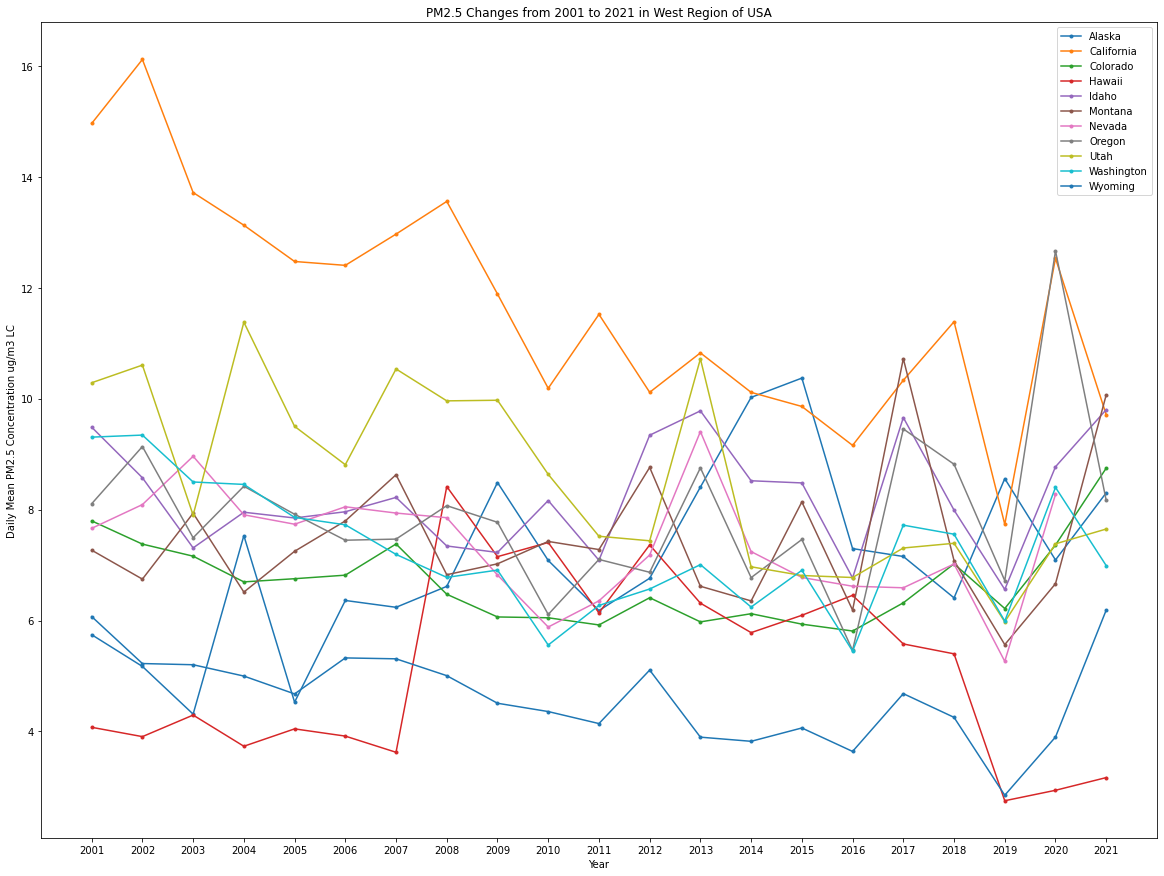

In [22]:
plt.figure(figsize = (20, 15))
plt.title('PM2.5 Changes from 2001 to 2021 in West Region of USA')
for state in df_W_State:
    plt.plot(df_W_State.index, df_W_State[state], marker = '.', label = state)
    
plt.xlabel('Year')
plt.ylabel('Daily Mean PM2.5 Concentration ug/m3 LC')
plt.xticks(df_W_State.index)
plt.legend()
plt.savefig('WestRegion.png')
plt.show()

##### From this graph, some states had big increase in Daily Mean PM2.5 Concentration in 2003, 2007, 2012, 2016, and 2019. The daily mean pm2.5 concentration had increased from 2007 to 2018, while most of other state had a decrease during that period.

In [23]:
def max_to_min(arr):
    return arr.max() - arr.min()

In [24]:
df_W_State.agg(['mean', 'max', 'min', max_to_min])

STATE          Alaska  California  Colorado    Hawaii     Idaho    Montana  \
mean         7.077585   11.651580  6.686139  5.168920  8.230806   7.468737   
max         10.370991   16.115943  8.747408  8.415396  9.802032  10.721649   
min          4.312162    7.734399  5.810685  2.750535  6.560261   5.565297   
max_to_min   6.058829    8.381544  2.936723  5.664861  3.241771   5.156352   

STATE         Nevada     Oregon       Utah  Washington   Wyoming  
mean        7.381301   7.913309   8.548767    7.272511  4.629652  
max         9.406435  12.664881  11.378592    9.343327  6.188360  
min         5.264259   5.461860   5.976988    5.448675  2.849688  
max_to_min  4.142177   7.203020   5.401604    3.894651  3.338672

##### If we check the difference between the maxium and minium value of Daily Mean PM2.5 concentration, we can find that California, Oregon, and Alaska presented the biggest difference amoung all states in west region

#### Step3: Display yearly changes of each state

In [25]:
df_W_Year = df_W.groupby(['Year','STATE'], as_index = False).mean()
df_W_Year.head()

Year       STATE       Site ID       POC  Daily Mean PM2.5 Concentration  \
0  2001      Alaska  2.096202e+07  1.000000                        5.744135   
1  2001  California  6.054618e+07  1.369699                       14.962102   
2  2001    Colorado  8.051367e+07  1.172299                        7.796771   
3  2001      Hawaii  1.500408e+08  1.000000                        4.074513   
4  2001       Idaho  1.603637e+08  1.349794                        9.486214   

   DAILY_AQI_VALUE  DAILY_OBS_COUNT  PERCENT_COMPLETE  AQS_PARAMETER_CODE  \
0        21.955268              1.0             100.0        88147.238569   
1        50.436897              1.0             100.0        88184.339398   
2        30.713036              1.0             100.0        88196.107423   
3        16.358171              1.0             100.0        88174.001693   
4        35.308299              1.0             100.0        88178.697188   

      CBSA_CODE  STATE_CODE  COUNTY_CODE  SITE_LATITUDE  SITE_LONGITUDE  
0  17334.758621         2.0    96.200795      61.255752     -145.881895  
1  34027.292843         6.0    54.439362      36.069972     -119.428521  
2  21662.311519         8.0    51.270972      39.312271     -105.754816  
3  41325.469941        15.0     3.902625      21.073162     -157.409670  
4  29172.126160        16.0    36.369684      44.039782     -114.636919

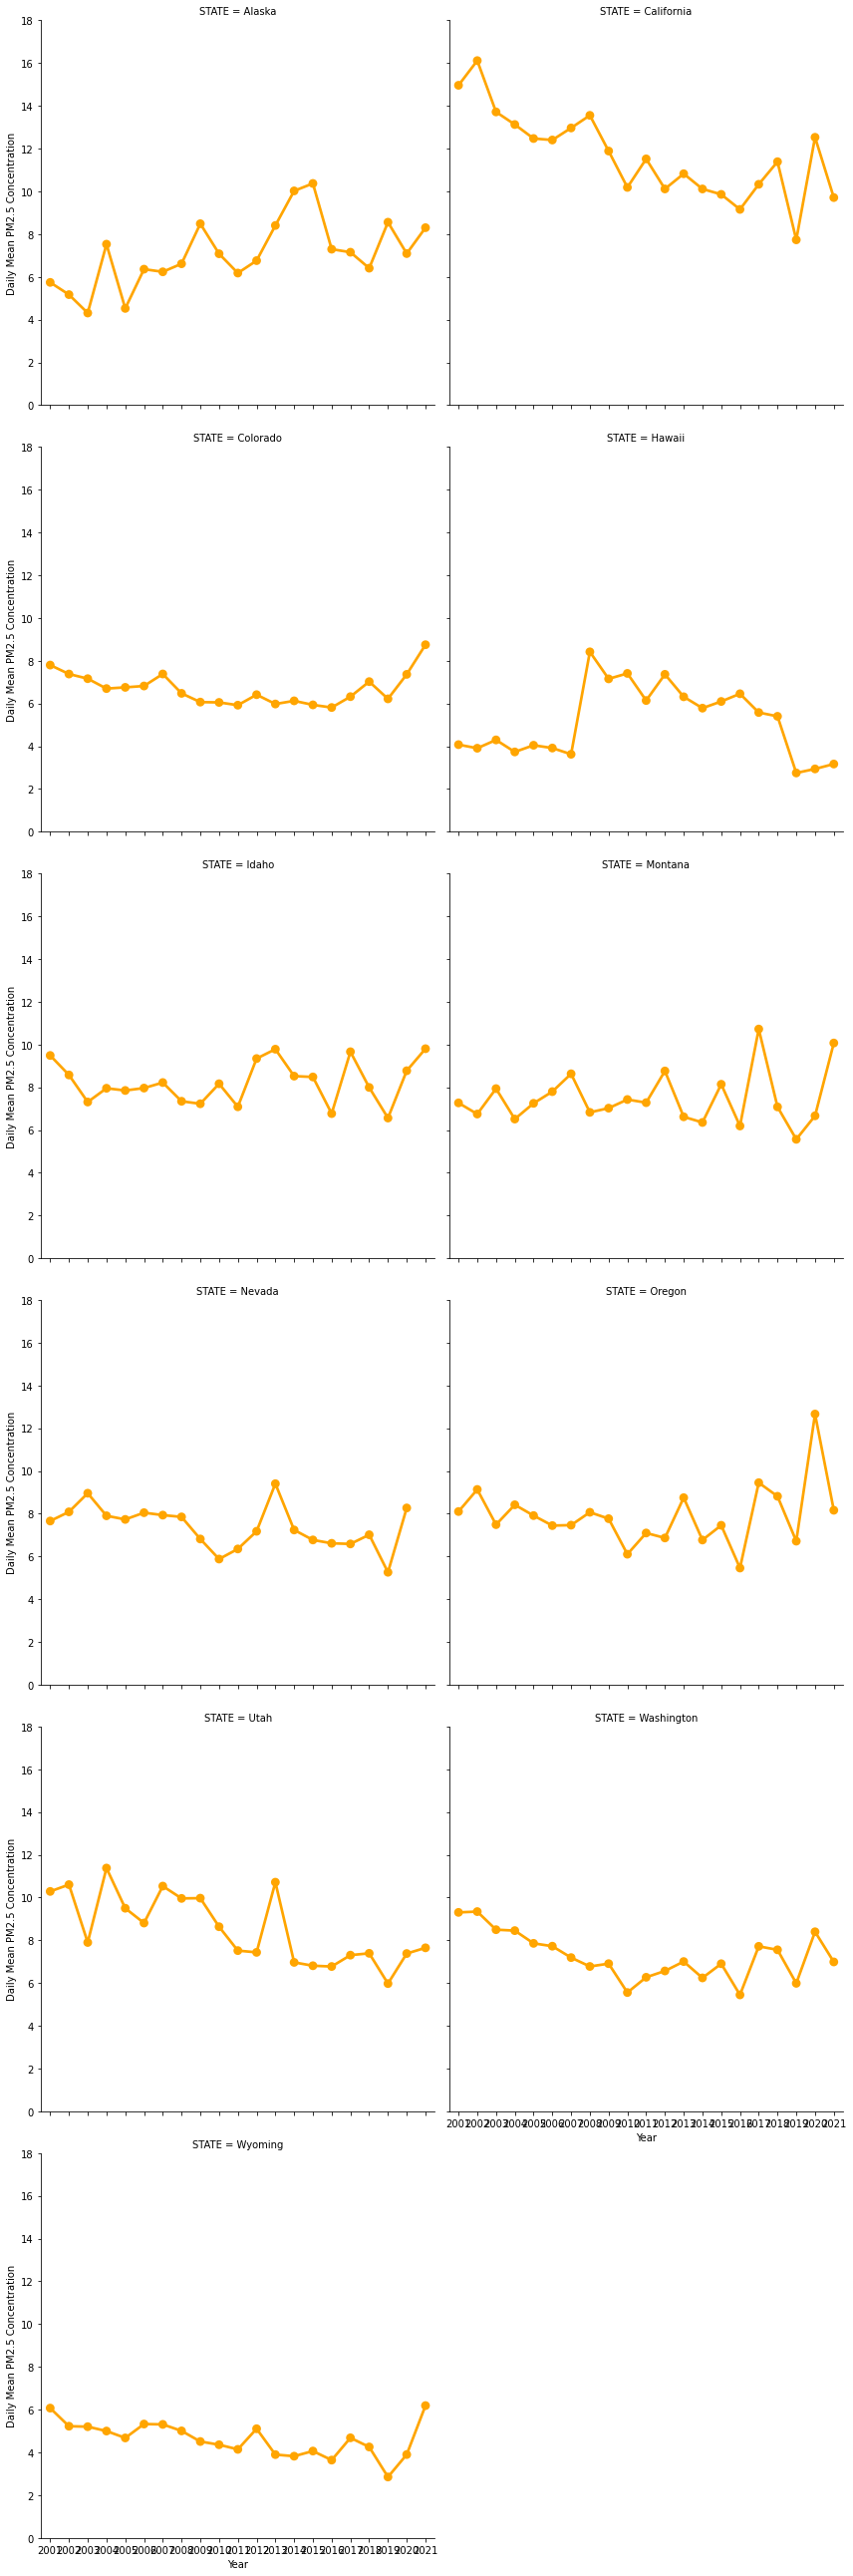

In [26]:
g = sn.FacetGrid(df_W_Year, col= "STATE", col_wrap=2, height=6, ylim=(0, 18))
g.map(sn.pointplot, "Year", "Daily Mean PM2.5 Concentration", order= np.arange(2001, 2022, 1), color="Orange", ci=None)

#### Step4: display seasonal changes of each state

In [27]:
df_W_Year = df_W.groupby(['Year','Season','STATE'], as_index = False).mean()
df_W_Year.head()

Year  Season       STATE       Site ID       POC  \
0  2001  Autumn      Alaska  2.100397e+07  1.000000   
1  2001  Autumn  California  6.054011e+07  1.415616   
2  2001  Autumn    Colorado  8.052299e+07  1.193026   
3  2001  Autumn      Hawaii  1.500406e+08  1.000000   
4  2001  Autumn       Idaho  1.603543e+08  1.347469   

   Daily Mean PM2.5 Concentration  DAILY_AQI_VALUE  DAILY_OBS_COUNT  \
0                        6.104032        22.955645              1.0   
1                       17.215562        56.485205              1.0   
2                        7.022665        28.494396              1.0   
3                        3.625418        15.026756              1.0   
4                        8.327223        32.325581              1.0   

   PERCENT_COMPLETE  AQS_PARAMETER_CODE     CBSA_CODE  STATE_CODE  \
0             100.0        88160.826613  15794.562212         2.0   
1             100.0        88189.000274  33779.031223         6.0   
2             100.0        88202.373599  21765.095541         8.0   
3             100.0        88178.785953  41102.742475        15.0   
4             100.0        88176.153215  29093.402675        16.0   

   COUNTY_CODE  SITE_LATITUDE  SITE_LONGITUDE  
0   100.395161      61.692529     -147.004664  
1    53.826301      36.049676     -119.417620  
2    52.195517      39.304743     -105.771318  
3     3.882943      21.053947     -157.379639  
4    35.426813      44.023421     -114.655376

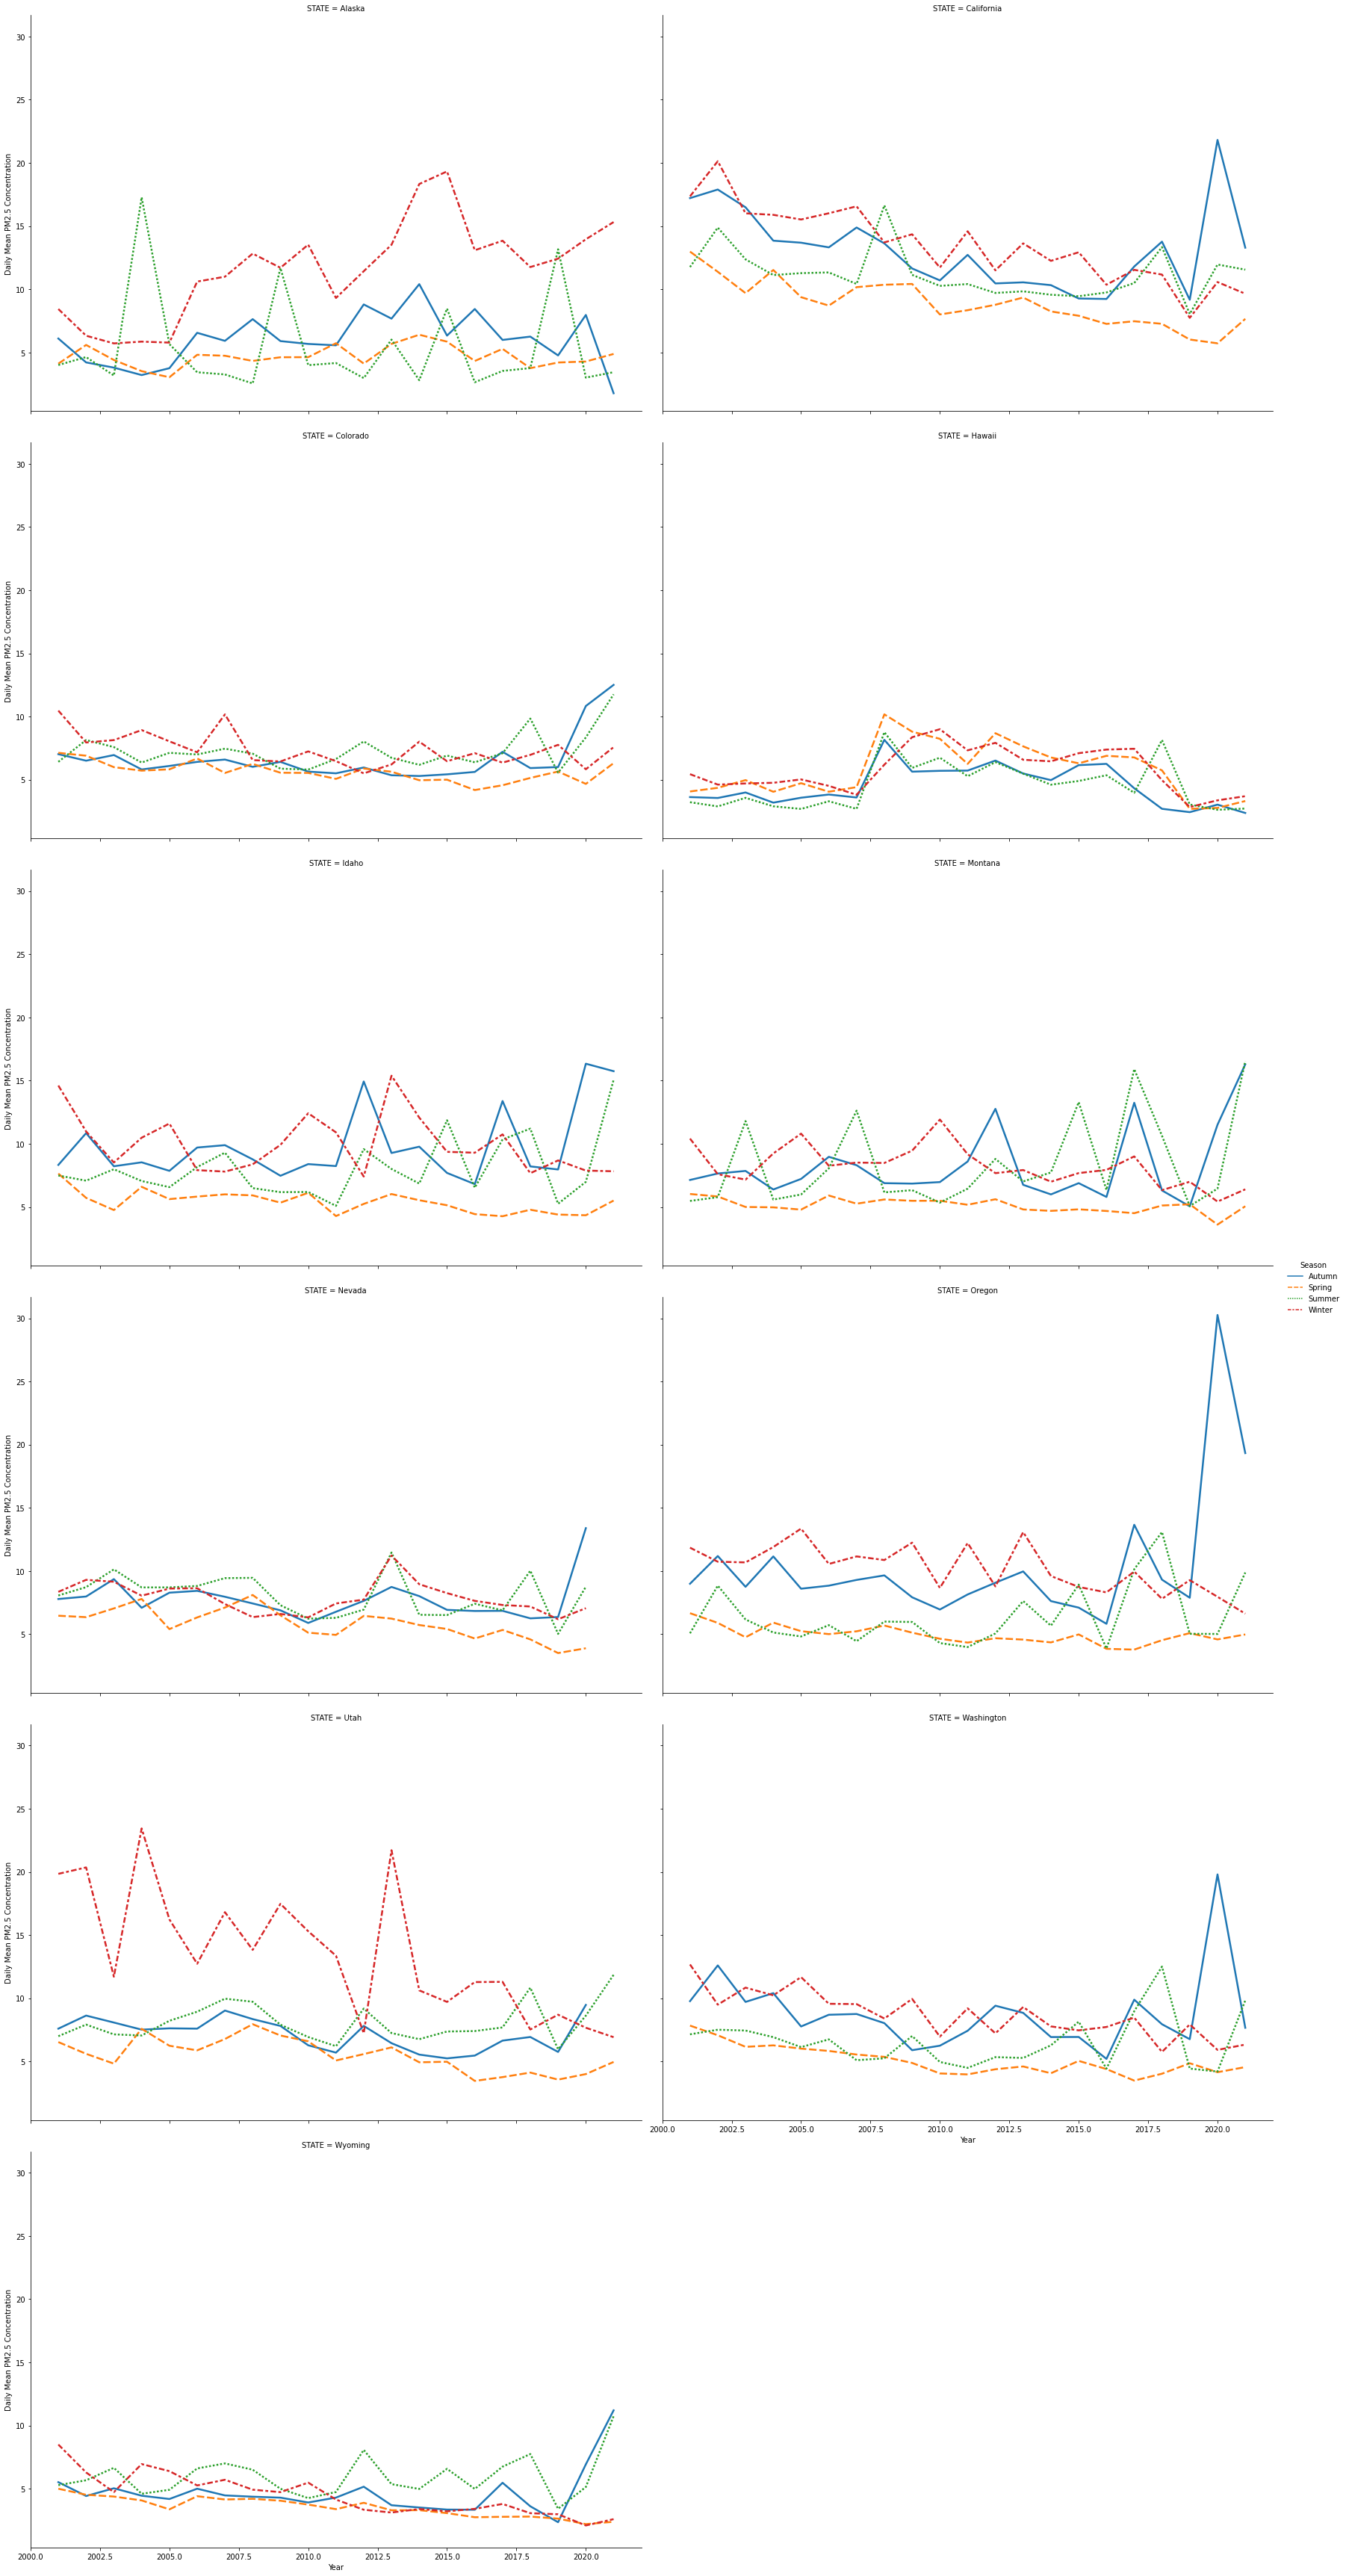

In [28]:
g = sn.relplot(x="Year", y="Daily Mean PM2.5 Concentration", hue="Season", style="Season",
            col="STATE", col_wrap=2,
            height=8, aspect=1.5, linewidth=2.5,
            kind="line", data= df_W_Year)

##### Summary: 
#####          1. Alaska, Utah trend to have highest PM2.5 concentration during winters
#####          2. Usually California, Oregon, and Washington states have highest PM2.5 concentration during winters but it changed to Autumns in recent years
#####          3. Colorado, Hawaii, Nevada states do not have big changes on PM2.5 concentration during each season
#####          4. Wyoming state trend to have highest PM2.5 concentration during summers

# Part3: Analyzing yearly and seasonal changes of Midwest Region

#### Step1: display the distribution of sites on the map

In [29]:
df_MW_map = df_MW.pivot_table(index = ['Site ID', 'SITE_LATITUDE', 'SITE_LONGITUDE'], columns = 'Year')['Daily Mean PM2.5 Concentration']
df_MW_map

Year                                         2001       2002       2003  \
Site ID   SITE_LATITUDE SITE_LONGITUDE                                    
170010006 39.933010     -91.404237      12.205085  13.770000  13.367213   
170010007 39.915409     -91.335868            NaN        NaN        NaN   
170190004 40.123796     -88.229531      12.662500  12.206780  13.159322   
170190006 40.123886     -88.240553            NaN        NaN        NaN   
170191001 40.052780     -88.372510      11.546296  11.875207  11.948739   
...                                           ...        ...        ...   
551330027 43.020075     -88.215070      11.989109  11.171756  10.093200   
551330034 43.007222     -88.229722      13.206957  12.340351   8.980000   
551350004 44.352880     -89.050830            NaN        NaN        NaN   
551390011 44.075262     -88.529835      10.680342  10.549167  10.500000   
551410016 44.382465     -89.819291       9.790351  10.412500  11.466667   

Year                                         2004       2005       2006  \
Site ID   SITE_LATITUDE SITE_LONGITUDE                                    
170010006 39.933010     -91.404237      10.549123  14.596491  11.131148   
170010007 39.915409     -91.335868            NaN        NaN        NaN   
170190004 40.123796     -88.229531      10.482759  13.896552  12.065000   
170190006 40.123886     -88.240553            NaN        NaN        NaN   
170191001 40.052780     -88.372510      10.377049  13.213115  10.028205   
...                                           ...        ...        ...   
551330027 43.020075     -88.215070      11.601224  15.518129  13.741573   
551330034 43.007222     -88.229722            NaN        NaN        NaN   
551350004 44.352880     -89.050830       9.280645  11.601613  15.200000   
551390011 44.075262     -88.529835            NaN        NaN        NaN   
551410016 44.382465     -89.819291            NaN        NaN        NaN   

Year                                         2007       2008       2009  \
Site ID   SITE_LATITUDE SITE_LONGITUDE                                    
170010006 39.933010     -91.404237            NaN        NaN        NaN   
170010007 39.915409     -91.335868            NaN   9.181356   8.426415   
170190004 40.123796     -88.229531            NaN  10.487931  10.465000   
170190006 40.123886     -88.240553            NaN        NaN        NaN   
170191001 40.052780     -88.372510            NaN  10.022314   9.410484   
...                                           ...        ...        ...   
551330027 43.020075     -88.215070      14.414444  13.344086  11.470109   
551330034 43.007222     -88.229722            NaN        NaN        NaN   
551350004 44.352880     -89.050830            NaN        NaN        NaN   
551390011 44.075262     -88.529835            NaN        NaN        NaN   
551410016 44.382465     -89.819291            NaN        NaN        NaN   

Year                                         2010  ...      2012      2013  \
Site ID   SITE_LATITUDE SITE_LONGITUDE             ...                       
170010006 39.933010     -91.404237            NaN  ...       NaN       NaN   
170010007 39.915409     -91.335868      10.453448  ...       NaN       NaN   
170190004 40.123796     -88.229531      13.362500  ...       NaN       NaN   
170190006 40.123886     -88.240553            NaN  ...       NaN       NaN   
170191001 40.052780     -88.372510       9.637500  ...   7.62500  8.107759   
...                                           ...  ...       ...       ...   
551330027 43.020075     -88.215070      11.537778  ...  11.69085  9.484532   
551330034 43.007222     -88.229722            NaN  ...       NaN       NaN   
551350004 44.352880     -89.050830            NaN  ...       NaN       NaN   
551390011 44.075262     -88.529835            NaN  ...       NaN       NaN   
551410016 44.382465     -89.819291            NaN  ...       NaN       NaN   

Year                                         2014      20

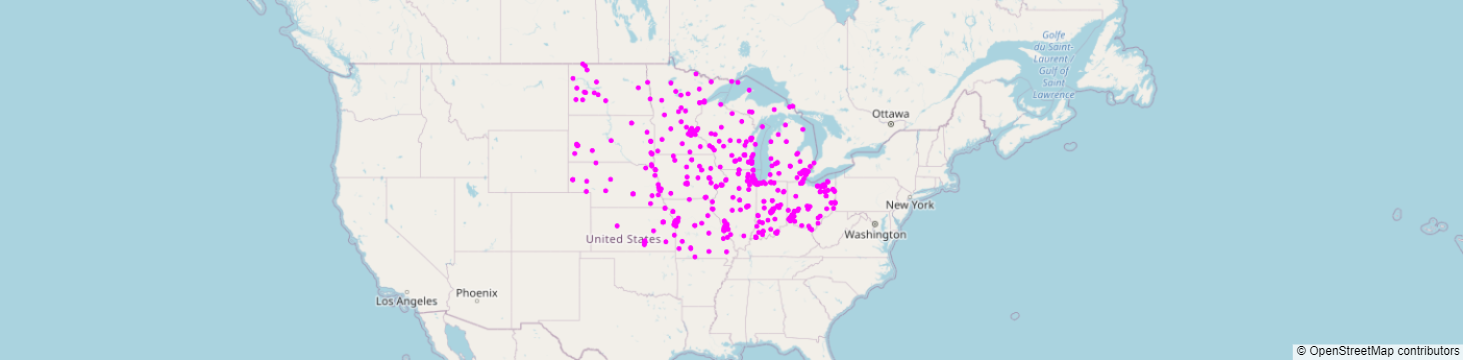

In [30]:
import pandas as pd
lat = list(df_MW_map.index.get_level_values(1))
lon = list(df_MW_map.index.get_level_values(2))
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")
names = list(df_MW_map.index.get_level_values(0))
import plotly.express as px

fig = px.scatter_mapbox(us_cities, lat= lat, lon=lon, hover_name= names,
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### Step2: compare all states of midwest region in a single graph

In [31]:
df_MW_State = df_MW.groupby(['Year','STATE'], as_index = False).mean()
df_MW_State.head()

Year     STATE       Site ID       POC  Daily Mean PM2.5 Concentration  \
0  2001  Illinois  1.707816e+08  1.108686                       15.662541   
1  2001   Indiana  1.809781e+08  1.215432                       15.633426   
2  2001      Iowa  1.912981e+08  1.269741                       11.528896   
3  2001    Kansas  2.015698e+08  1.263534                       11.487507   
4  2001  Michigan  2.610526e+08  1.284056                       13.637632   

   DAILY_AQI_VALUE  DAILY_OBS_COUNT  PERCENT_COMPLETE  AQS_PARAMETER_CODE  \
0        55.077566              1.0             100.0        88118.787041   
1        55.047377              1.0             100.0        88127.795216   
2        43.133823              1.0             100.0        88128.041579   
3        43.925640              1.0             100.0        88113.881618   
4        48.293179              1.0             100.0        88140.576197   

      CBSA_CODE  STATE_CODE  COUNTY_CODE  SITE_LATITUDE  SITE_LONGITUDE  
0  23635.714959        17.0    78.034371      41.060644      -88.521063  
1  26458.596764        18.0    97.770370      40.358560      -86.617792  
2  23257.381043        19.0   129.745632      41.849943      -92.486115  
3  37213.694230        20.0   156.977394      38.497948      -95.666695  
4  24436.374545        26.0   105.230147      43.168257      -84.346662

In [32]:
df_MW_State = df_MW_State.pivot_table(index='Year', columns='STATE')['Daily Mean PM2.5 Concentration']
df_MW_State.head()

STATE   Illinois    Indiana       Iowa     Kansas   Michigan  Minnesota  \
Year                                                                      
2001   15.662541  15.633426  11.528896  11.487507  13.637632   9.875528   
2002   14.921984  14.892124  11.042448  11.260809  12.738746   9.406775   
2003   14.377772  14.510061  11.162913  10.900193  13.055172   9.892387   
2004   13.062780  13.545059  10.099129   9.699423  11.455255   9.006392   
2005   15.758126  16.235471  12.200204  11.105209  13.770227   9.353418   

STATE   Missouri  Nebraska  North Dakota       Ohio  South Dakota  Wisconsin  
Year                                                                          
2001   13.960573  9.423192      6.633277  16.676006      7.700535  12.039364  
2002   13.696101  8.863599      5.887143  15.852002      7.289645  11.246327  
2003   13.076477  9.063556      6.476209  15.316349      7.804903  10.741080  
2004   11.886565  8.148061      5.828052  14.451862      7.754919  10.039217  
2005   14.440866  9.447050      5.805141  16.961277      8.274524  12.030083

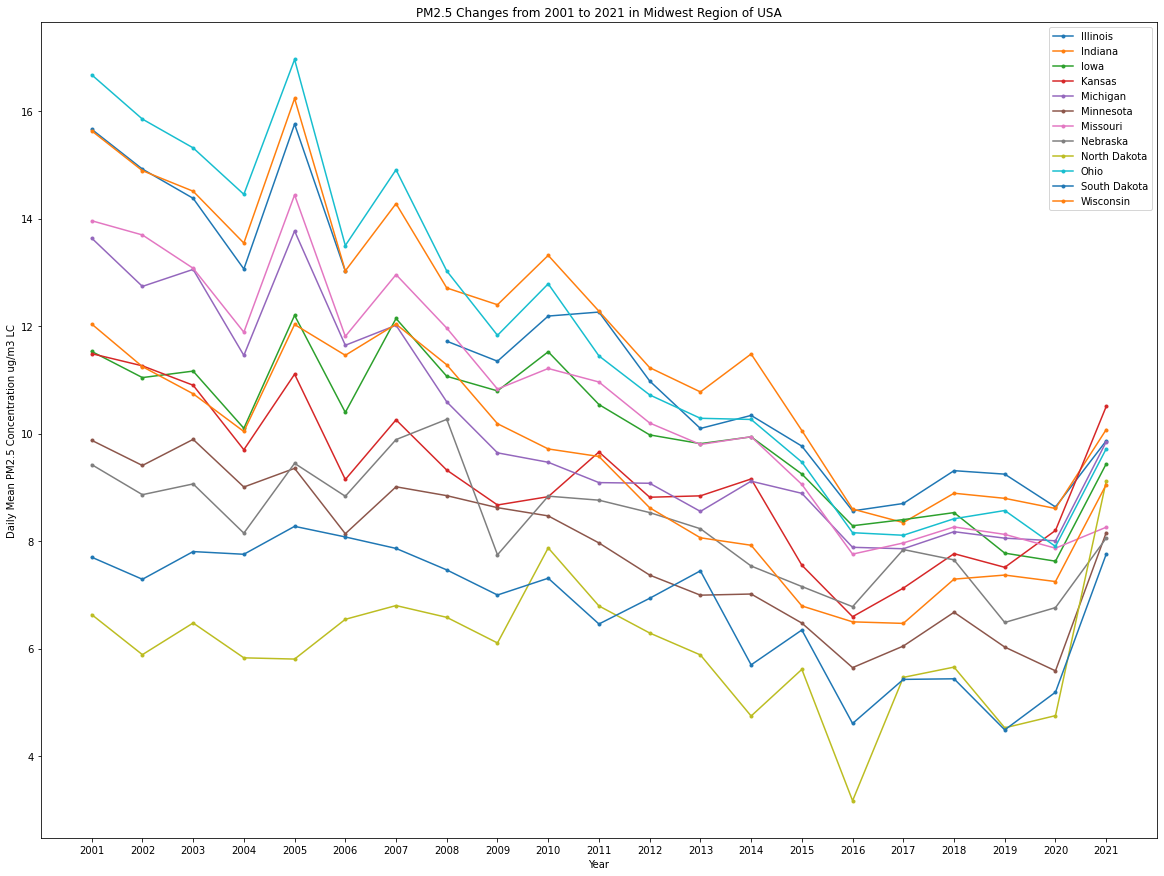

In [33]:
plt.figure(figsize = (20, 15))
plt.title('PM2.5 Changes from 2001 to 2021 in Midwest Region of USA')
for state in df_MW_State:
    plt.plot(df_MW_State.index, df_MW_State[state], marker = '.', label = state)
    
plt.xlabel('Year')
plt.ylabel('Daily Mean PM2.5 Concentration ug/m3 LC')
plt.xticks(df_MW_State.index)
plt.legend()
plt.savefig('MidwestRegion.png')
plt.show()

##### States in Midwest region showed that the overall PM2.5 concentration have been decreasing but increasing from 2020. The rise and fall of PM2.5 concentration are surprisingly consistent in states of Midwest region

In [34]:
df_MW_State.agg(['mean', 'max', 'min', max_to_min])

STATE        Illinois    Indiana       Iowa     Kansas   Michigan  Minnesota  \
mean        11.490946  11.889270  10.072682   9.161862  10.121931   7.836929   
max         15.758126  16.235471  12.200204  11.487507  13.770227   9.892387   
min          8.561979   8.344461   7.626198   6.593134   7.857455   5.585763   
max_to_min   7.196147   7.891010   4.574005   4.894374   5.912772   4.306623   

STATE        Missouri   Nebraska  North Dakota       Ohio  South Dakota  \
mean        10.667715   8.300184      6.025845  11.826626      6.777445   
max         14.440866  10.264970      9.116289  16.961277      8.274524   
min          7.758012   6.485893      3.169222   7.900470      4.487997   
max_to_min   6.682854   3.779077      5.947067   9.060807      3.786527   

STATE       Wisconsin  
mean         9.317432  
max         12.039364  
min          6.468923  
max_to_min   5.570440

##### If we check the difference between the maxium and minium value of Daily Mean PM2.5 concentration, we can find that Ohio, Indiana, and Illinois states presented the biggest difference amoung all states in west region

#### Step3: display seasonal changes of each state

In [35]:
df_MW_Year = df_MW.groupby(['Year','Season','STATE'], as_index = False).mean()
df_MW_Year.head()

Year  Season     STATE       Site ID       POC  \
0  2001  Autumn  Illinois  1.707627e+08  1.162688   
1  2001  Autumn   Indiana  1.809708e+08  1.239105   
2  2001  Autumn      Iowa  1.913028e+08  1.316076   
3  2001  Autumn    Kansas  2.015840e+08  1.358447   
4  2001  Autumn  Michigan  2.610317e+08  1.332784   

   Daily Mean PM2.5 Concentration  DAILY_AQI_VALUE  DAILY_OBS_COUNT  \
0                       13.090009        47.887710              1.0   
1                       13.022438        47.728504              1.0   
2                        9.189646        36.145777              1.0   
3                        9.983105        38.641553              1.0   
4                       11.245222        41.102142              1.0   

   PERCENT_COMPLETE  AQS_PARAMETER_CODE     CBSA_CODE  STATE_CODE  \
0             100.0        88125.818744  23416.863799        17.0   
1             100.0        88134.770907  26369.821853        18.0   
2             100.0        88132.686649  23121.120944        19.0   
3             100.0        88123.888128  36908.219178        20.0   
4             100.0        88146.583196  24789.065180        26.0   

   COUNTY_CODE  SITE_LATITUDE  SITE_LONGITUDE  
0    76.147657      41.059459      -88.497286  
1    97.036514      40.350795      -86.599138  
2   130.209809      41.846536      -92.476596  
3   158.397260      38.512132      -95.646220  
4   103.138386      43.258010      -84.393373

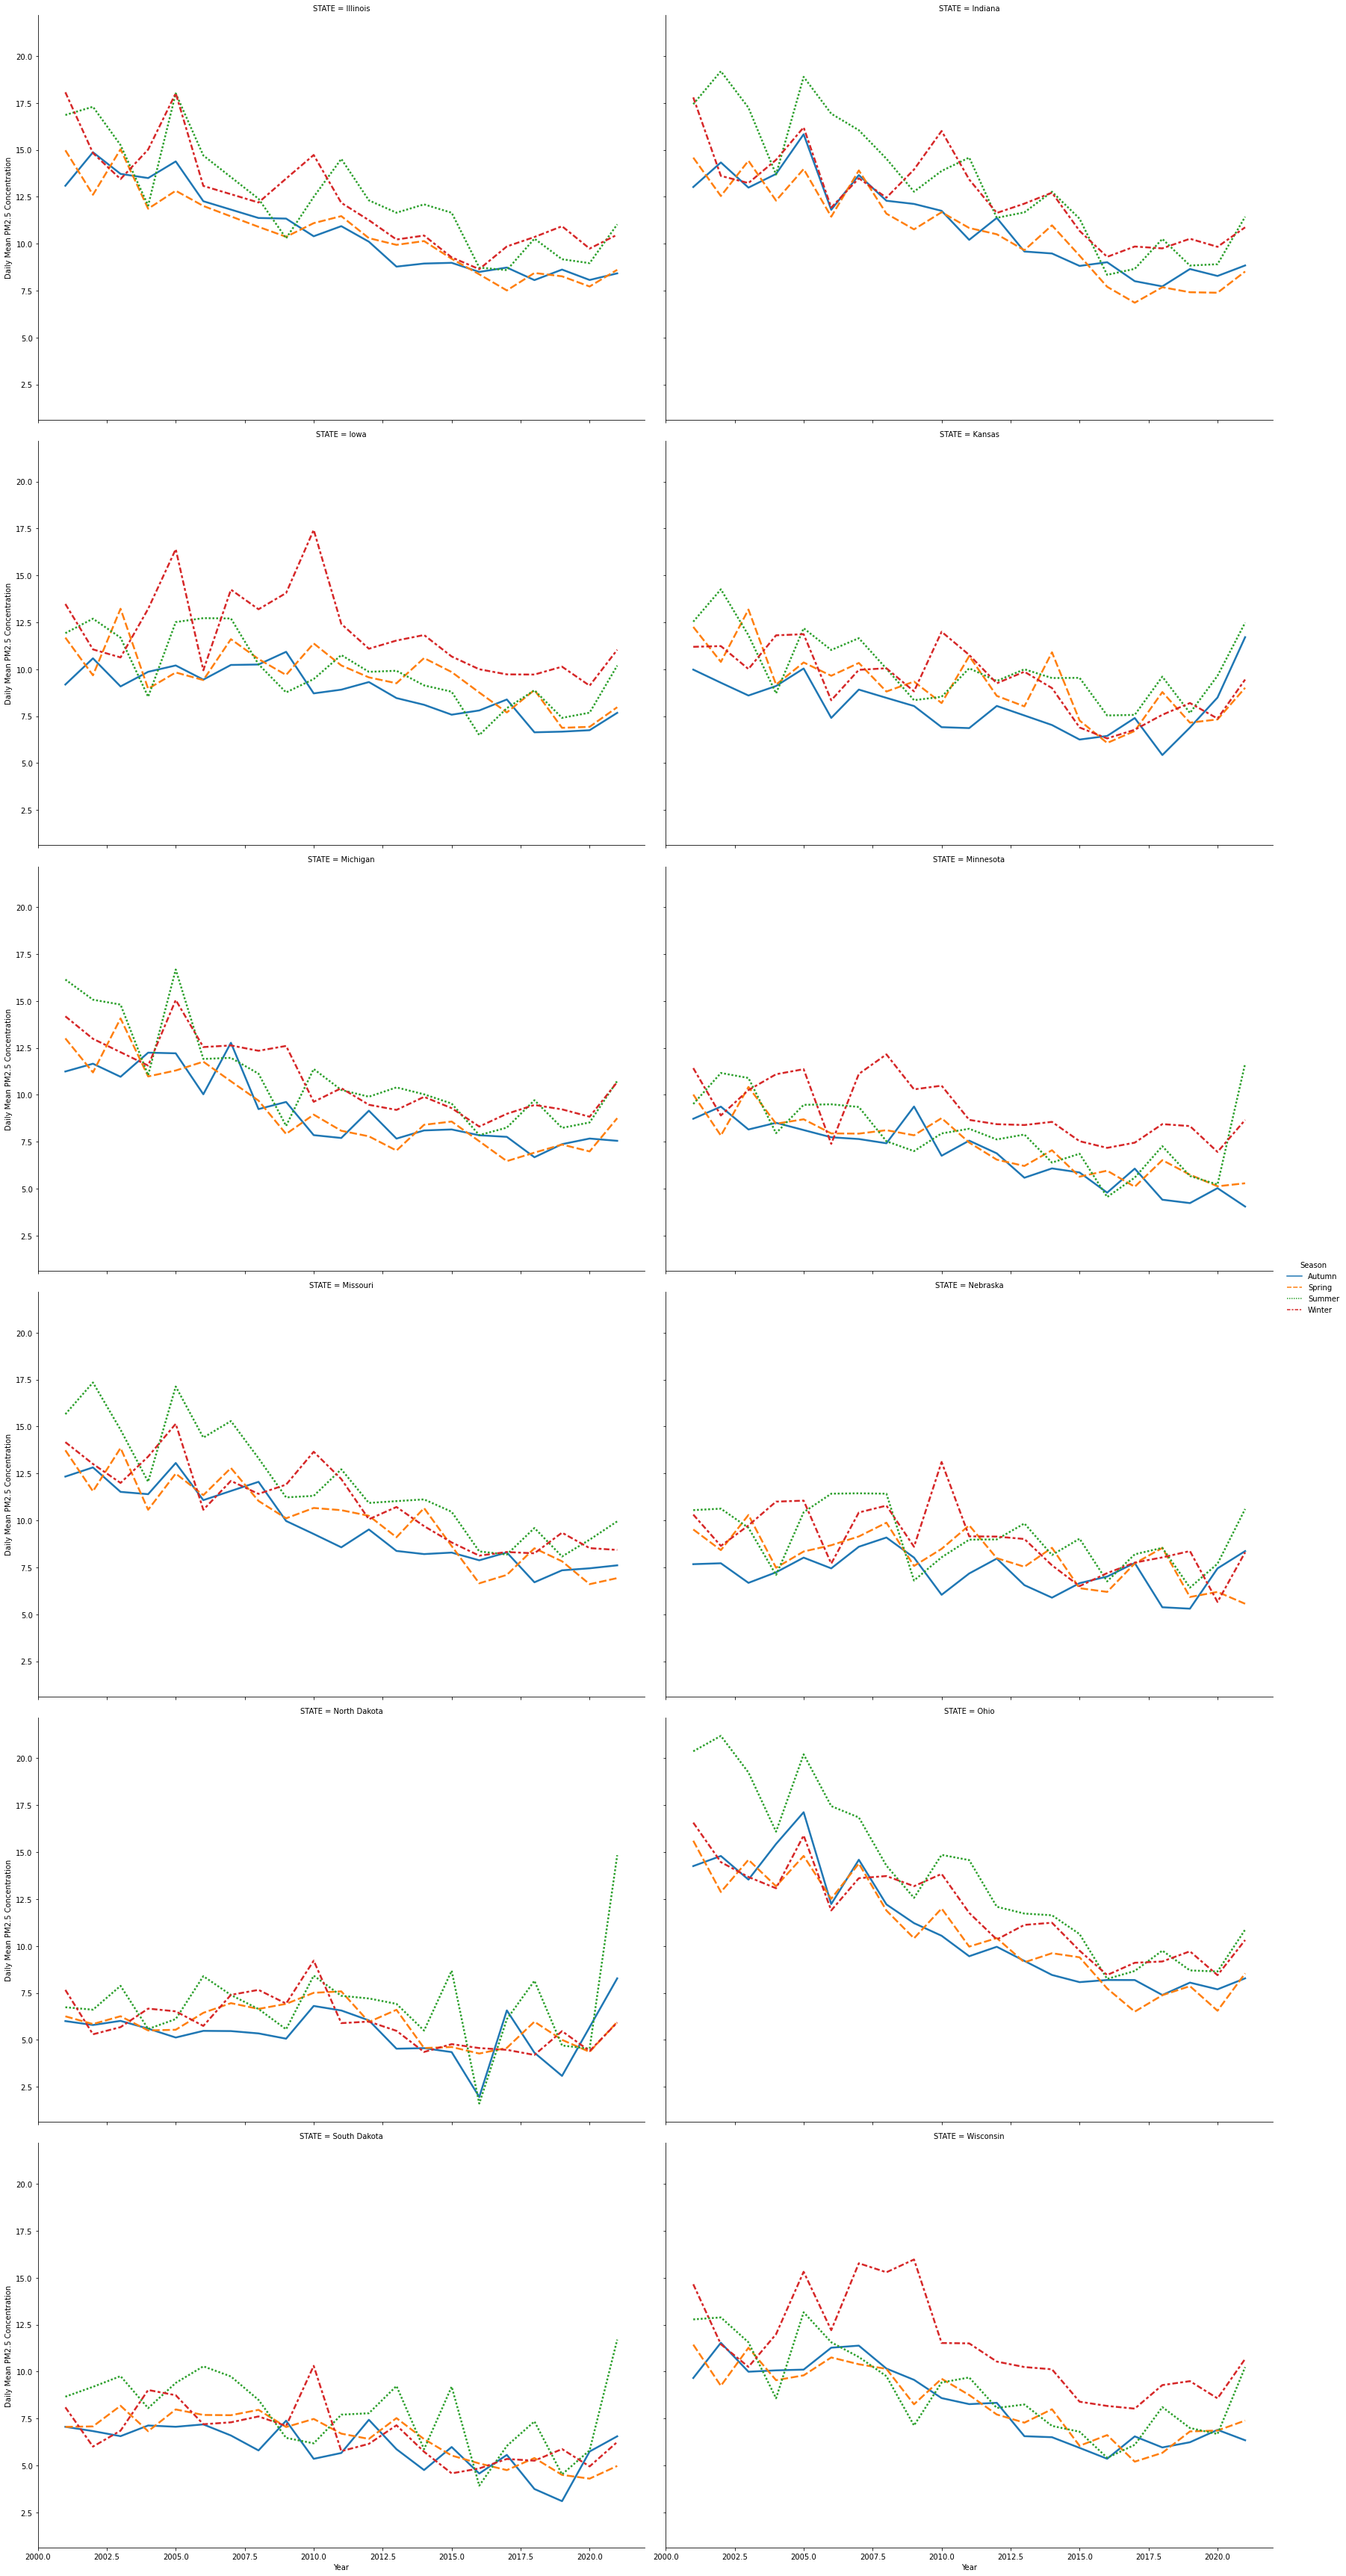

In [36]:
g = sn.relplot(x="Year", y="Daily Mean PM2.5 Concentration", hue="Season", style="Season",
            col="STATE", col_wrap=2,
            height=8, aspect=1.5, linewidth=2.5,
            kind="line", data= df_MW_Year)

#### Summary:
##### Winter or Summer are the two seasons that have highest PM2.5 concentration during the whole year in Midwest region. Lowa and Wisconsin usually have highest PM2.5 concentration in winters while other states have highest PM2.5 concentration sometime in summers and sometimes in winters

# Part4: Analyzing yearly and seasonal changes of Southwest Region

#### Step1: display the distribution of sites on the map

In [38]:
df_SW_map = df_SW.pivot_table(index = ['Site ID', 'SITE_LATITUDE', 'SITE_LONGITUDE'], columns = 'Year')['Daily Mean PM2.5 Concentration']
df_SW_map

Year                                         2001       2002       2003  \
Site ID   SITE_LATITUDE SITE_LONGITUDE                                    
40011235  35.880404     -109.438003           NaN        NaN        NaN   
40018001  34.058475     -109.441259      3.377895   2.699038   3.064220   
40031005  31.349200     -109.539683      7.200000   7.383636   6.546296   
40038001  32.009410     -109.389060      3.640336   3.923077   4.089189   
40051008  35.206111     -111.652777      6.928302   7.078947   5.884091   
...                                           ...        ...        ...   
484530021 30.263204     -97.712891      10.780128  11.738596  11.894118   
484531068 30.353860     -97.691660            NaN        NaN        NaN   
484790016 27.517456     -99.515222      10.242276  10.051667  12.078571   
484790313 27.599444     -99.533333            NaN        NaN        NaN   
484850315 33.863022     -98.571788            NaN        NaN        NaN   

Year                                        2004       2005       2006  \
Site ID   SITE_LATITUDE SITE_LONGITUDE                                   
40011235  35.880404     -109.438003          NaN        NaN        NaN   
40018001  34.058475     -109.441259     2.497414   2.927966   2.422018   
40031005  31.349200     -109.539683     6.812903   8.296721   8.237190   
40038001  32.009410     -109.389060     2.922689   3.131818   3.651351   
40051008  35.206111     -111.652777     6.816071   6.045455   6.684746   
...                                          ...        ...        ...   
484530021 30.263204     -97.712891           NaN        NaN        NaN   
484531068 30.353860     -97.691660           NaN        NaN        NaN   
484790016 27.517456     -99.515222           NaN        NaN        NaN   
484790313 27.599444     -99.533333           NaN  11.307071  11.461944   
484850315 33.863022     -98.571788           NaN   9.617708   7.919143   

Year                                         2007       2008       2009  \
Site ID   SITE_LATITUDE SITE_LONGITUDE                                    
40011235  35.880404     -109.438003           NaN   3.023810   3.624107   
40018001  34.058475     -109.441259      2.911966   3.667521   2.922727   
40031005  31.349200     -109.539683      7.526667   8.500000   7.879508   
40038001  32.009410     -109.389060      3.449107   3.421552   3.095798   
40051008  35.206111     -111.652777      7.968966   5.928814   7.388333   
...                                           ...        ...        ...   
484530021 30.263204     -97.712891            NaN  10.073214  10.072881   
484531068 30.353860     -97.691660            NaN        NaN        NaN   
484790016 27.517456     -99.515222            NaN        NaN        NaN   
484790313 27.599444     -99.533333      11.305398  11.334746  10.978827   
484850315 33.863022     -98.571788       8.442812   7.617564   6.692837   

Year                                         2010  ...       2012       2013  \
Site ID   SITE_LATITUDE SITE_LONGITUDE             ...                         
40011235  35.880404     -109.438003      2.921429  ...   2.823000        NaN   
40018001  34.058475     -109.441259      2.335455  ...   3.283636   2.791892   
40031005  31.349200     -109.539683      7.509756  ...   8.143333   6.826690   
40038001  32.009410     -109.389060      2.788696  ...   3.518103   3.278814   
40051008  35.206111     -111.652777      5.075000  ...   5.403333   5.426667   
...                                           ...  ...        ...        ...   
484530021 30.263204     -97.712891      10.019298  ...   9.423704   9.071357   
484531068 30.353860     -97.691660            NaN  ...        NaN        NaN   
484790016 27.517456     -99.515222            NaN  ...        NaN        NaN   
484790313 27.599444     -99.533333      10.355828  ...  10.488657  10.228198   
484850315 33.863022     -98.571788       6.693204  ...   7.097910   7.203188   

Year                                        

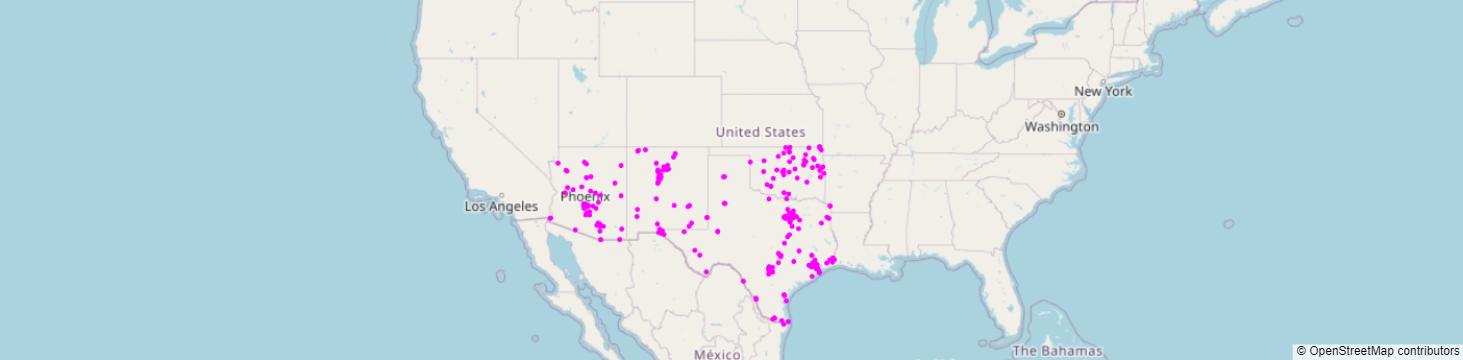

In [39]:
import pandas as pd
lat = list(df_SW_map.index.get_level_values(1))
lon = list(df_SW_map.index.get_level_values(2))
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")
names = list(df_SW_map.index.get_level_values(0))
import plotly.express as px

fig = px.scatter_mapbox(us_cities, lat= lat, lon=lon, hover_name= names,
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### Step2: compare all states of southwest region in a single graph

In [40]:
df_SW_State = df_SW.groupby(['Year','STATE']).mean()
df_SW_State.head()

Site ID       POC  Daily Mean PM2.5 Concentration  \
Year STATE                                                                
2001 Arizona     4.013565e+07  1.249840                        7.451281   
     New Mexico  3.501742e+08  1.789039                        6.613644   
     Oklahoma    4.009715e+08  1.219568                       11.141496   
     Texas       4.821689e+08  1.654871                       10.805544   
2002 Arizona     4.014674e+07  1.316062                        7.295531   

                 DAILY_AQI_VALUE  DAILY_OBS_COUNT  PERCENT_COMPLETE  \
Year STATE                                                            
2001 Arizona           29.419923              1.0             100.0   
     New Mexico        26.068333              1.0             100.0   
     Oklahoma          42.404604              1.0             100.0   
     Texas             41.691149              1.0             100.0   
2002 Arizona           28.942681              1.0             100.0   

                 AQS_PARAMETER_CODE     CBSA_CODE  STATE_CODE  COUNTY_CODE  \
Year STATE                                                                   
2001 Arizona           88275.169122  37301.136439         4.0    13.052530   
     New Mexico        88295.201330  23271.747176        35.0    17.238248   
     Oklahoma          88123.502158  37868.523780        40.0    96.943597   
     Texas             88127.449773  22735.699991        48.0   216.856850   
2002 Arizona           88310.460168  38896.923592         4.0    14.245466   

                 SITE_LATITUDE  SITE_LONGITUDE  
Year STATE                                      
2001 Arizona         33.642608     -111.538337  
     New Mexico      33.758977     -106.304316  
     Oklahoma        35.766858      -96.786144  
     Texas           30.992429      -98.500258  
2002 Arizona         33.408480     -111.327759

In [41]:
df_SW_State = df_SW_State.pivot_table(index='Year', columns= 'STATE')['Daily Mean PM2.5 Concentration']
df_SW_State.head()

STATE   Arizona  New Mexico   Oklahoma      Texas
Year                                             
2001   7.451281    6.613644  11.141496  10.805544
2002   7.295531    7.021184  10.494986  10.762331
2003   6.628735    7.170339  10.590771  11.472406
2004   5.769037    5.679410   9.971037  11.000000
2005   6.924369    5.749450  11.246264  11.300253

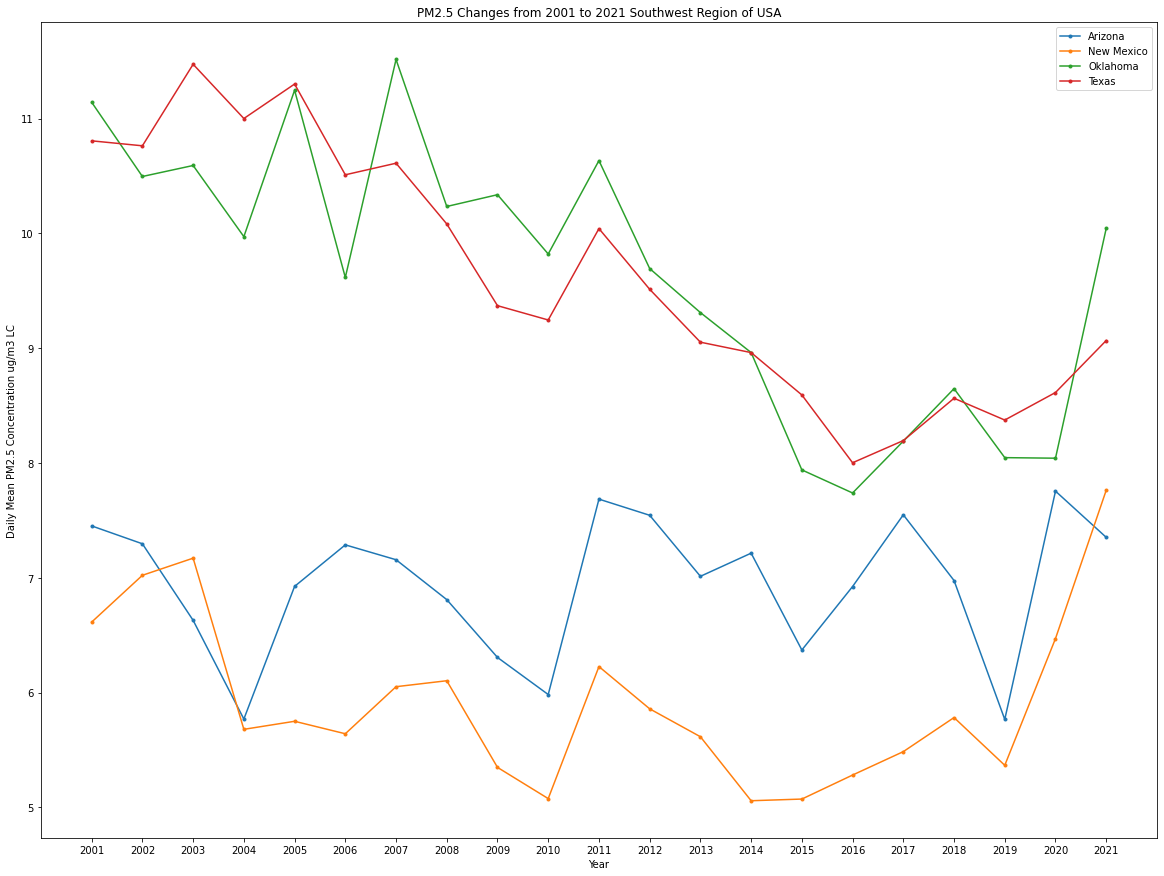

In [42]:
plt.figure(figsize = (20, 15))
plt.title('PM2.5 Changes from 2001 to 2021 Southwest Region of USA')
for state in df_SW_State:
    plt.plot(df_SW_State.index, df_SW_State[state], marker = '.', label = state)
    
plt.xlabel('Year')
plt.ylabel('Daily Mean PM2.5 Concentration ug/m3 LC')
plt.xticks(df_SW_State.index)
plt.legend()
plt.savefig('SouthwestRegion.png')
plt.show()

#### Summary: The overall PM2.5 Concentration is going down since 2001 with some years going up but it is going up in recent years

In [43]:
df_SW_State.agg(['mean', 'max', 'min', max_to_min])

STATE        Arizona  New Mexico   Oklahoma      Texas
mean        6.940614    5.925092   9.628873   9.625145
max         7.754204    7.761980  11.514357  11.472406
min         5.765804    5.057407   7.738118   8.001447
max_to_min  1.988400    2.704573   3.776238   3.470959

#### Step3: display seasonal changes of each state

In [44]:
df_SW_Year = df_SW.groupby(['Year','Season','STATE'], as_index = False).mean()
df_SW_Year.head()

Year  Season       STATE       Site ID       POC  \
0  2001  Autumn     Arizona  4.013832e+07  1.219454   
1  2001  Autumn  New Mexico  3.501704e+08  1.810886   
2  2001  Autumn    Oklahoma  4.009715e+08  1.243982   
3  2001  Autumn       Texas  4.821956e+08  1.656227   
4  2001  Spring     Arizona  4.013159e+07  1.274382   

   Daily Mean PM2.5 Concentration  DAILY_AQI_VALUE  DAILY_OBS_COUNT  \
0                        7.432740        29.953737              1.0   
1                        6.534410        26.207565              1.0   
2                       10.299344        39.241794              1.0   
3                       11.005535        41.642025              1.0   
4                        6.669311        27.417425              1.0   

   PERCENT_COMPLETE  AQS_PARAMETER_CODE     CBSA_CODE  STATE_CODE  \
0             100.0        88290.321471  37448.196319         4.0   
1             100.0        88297.800738  23608.280500        35.0   
2             100.0        88127.762582  37884.964871        40.0   
3             100.0        88127.285506  22513.613508        48.0   
4             100.0        88266.301691  36896.599190         4.0   

   COUNTY_CODE  SITE_LATITUDE  SITE_LONGITUDE  
0    13.322657      33.652619     -111.543405  
1    16.887454      33.711706     -106.278329  
2    96.938731      35.766654      -96.797621  
3   219.529497      31.080566      -98.781199  
4    12.635891      33.685706     -111.559206

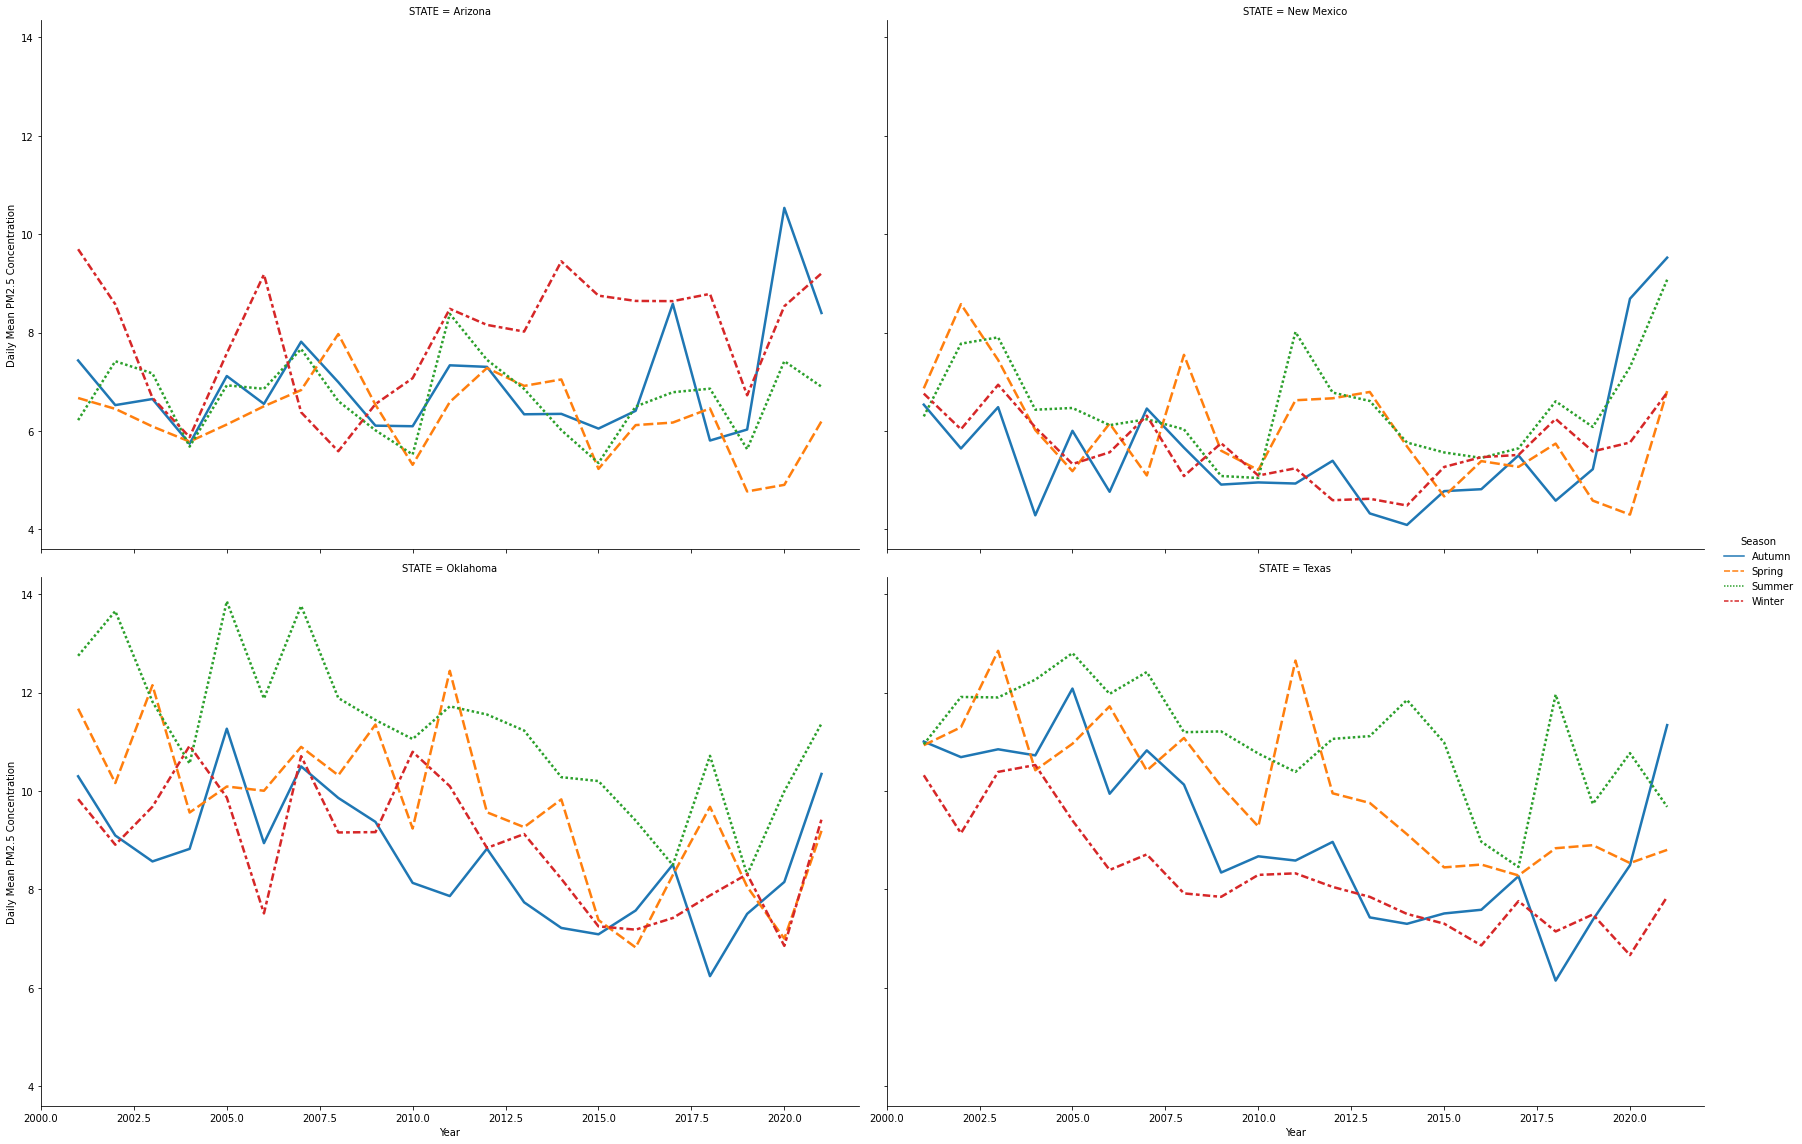

In [45]:
g = sn.relplot(x="Year", y="Daily Mean PM2.5 Concentration", hue="Season", style="Season",
            col="STATE", col_wrap=2,
            height=8, aspect=1.5, linewidth=2.5,
            kind="line", data= df_SW_Year)

#### Summary: Arizona has highest PM2.5 Concentrations in winters while the other 3 states have highest values in Spring or Summer.

# Part5: Analyzing yearly and seasonal changes of Southeast Region

In [46]:
df_SE_map = df_SE.pivot_table(index = ['Site ID', 'SITE_LATITUDE', 'SITE_LONGITUDE'], columns = 'Year')['Daily Mean PM2.5 Concentration']
df_SE_map

Year                                         2001       2002       2003  \
Site ID   SITE_LATITUDE SITE_LONGITUDE                                    
10030010  30.497478     -87.880258      10.552586  10.232743  12.169298   
10050002  31.664302     -85.606175            NaN        NaN  11.753333   
10270001  33.284928     -85.803608      12.808108  13.199153  13.488288   
10331002  34.762619     -87.638097      12.668000  12.552083  12.837069   
10491003  34.288567     -85.969858      14.241964  14.603738  14.904348   
...                                           ...        ...        ...   
540690010 40.114876     -80.700972            NaN        NaN        NaN   
540810002 37.807767     -81.197433      13.958678  13.025210  12.451724   
540890001 37.773176     -80.706472      10.723684  10.186364   9.668868   
540939000 39.105336     -79.425851       9.938793   9.018750   9.741739   
541071002 39.323533     -81.552367      17.372881  15.728448  15.151786   

Year                                         2004       2005       2006  \
Site ID   SITE_LATITUDE SITE_LONGITUDE                                    
10030010  30.497478     -87.880258      11.365766  11.580000  11.340777   
10050002  31.664302     -85.606175      13.212245  12.788136   9.963636   
10270001  33.284928     -85.803608      13.015789  13.473333  13.012397   
10331002  34.762619     -87.638097      11.812281  13.285470  12.611667   
10491003  34.288567     -85.969858      14.159459  14.195652  13.600000   
...                                           ...        ...        ...   
540690010 40.114876     -80.700972            NaN  15.345455  13.147059   
540810002 37.807767     -81.197433      12.506780  14.031624  12.149153   
540890001 37.773176     -80.706472       9.650877  12.629762        NaN   
540939000 39.105336     -79.425851       9.428689   9.985950   8.569492   
541071002 39.323533     -81.552367      14.942500  16.496460  14.765217   

Year                                         2007       2008       2009  \
Site ID   SITE_LATITUDE SITE_LONGITUDE                                    
10030010  30.497478     -87.880258      10.441818   9.597647   9.258537   
10050002  31.664302     -85.606175            NaN        NaN        NaN   
10270001  33.284928     -85.803608      13.425000  10.800000   9.132773   
10331002  34.762619     -87.638097      13.590517  11.212174   9.592328   
10491003  34.288567     -85.969858      14.077778  11.659091   9.676190   
...                                           ...        ...        ...   
540690010 40.114876     -80.700972      15.148718  12.837190  11.414074   
540810002 37.807767     -81.197433      13.366087  10.745133   9.276991   
540890001 37.773176     -80.706472            NaN        NaN        NaN   
540939000 39.105336     -79.425851       9.179832   7.131667   6.132787   
541071002 39.323533     -81.552367      15.338793  13.856637  12.061143   

Year                                         2010  ...       2012       2013  \
Site ID   SITE_LATITUDE SITE_LONGITUDE             ...                         
10030010  30.497478     -87.880258      10.238525  ...   9.200826   8.383784   
10050002  31.664302     -85.606175            NaN  ...        NaN        NaN   
10270001  33.284928     -85.803608      10.536283  ...   8.887603   8.045763   
10331002  34.762619     -87.638097      10.956098  ...   8.817355   8.617500   
10491003  34.288567     -85.969858      11.498058  ...   9.274107   8.991736   
...                                           ...  ...        ...        ...   
540690010 40.114876     -80.700972      13.403933  ...  10.439167  10.100826   
540810002 37.807767     -81.197433      10.329167  ...   8.326446   7.520000   
540890001 37.773176     -80.706472            NaN  ...        NaN        NaN   
540939000 39.105336     -79.425851       7.294118  ...   5.883193   5.442857   
541071002 39.323533     -81.552367      13.307692  ...  10.309910   9.475676   

Year                           

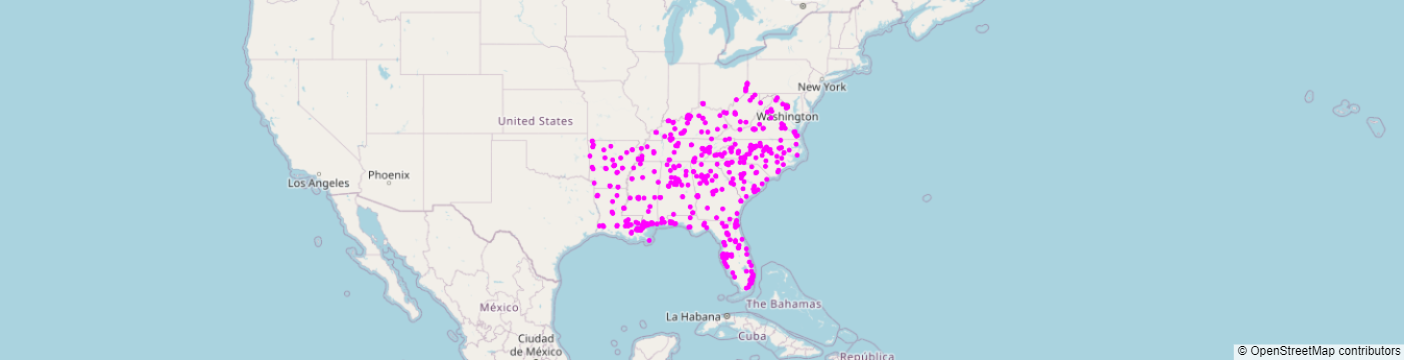

In [47]:
import pandas as pd
lat = list(df_SE_map.index.get_level_values(1))
lon = list(df_SE_map.index.get_level_values(2))
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")
names = list(df_SE_map.index.get_level_values(0))
import plotly.express as px

fig = px.scatter_mapbox(us_cities, lat= lat, lon=lon, hover_name= names,
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### Step2: compare all states of southeast region in a single graph

In [48]:
df_SE_State = df_SE.groupby(['Year','STATE']).mean()
df_SE_State.head()

Site ID       POC  Daily Mean PM2.5 Concentration  \
Year STATE                                                              
2001 Alabama   1.075960e+07  1.661749                       15.488282   
     Arkansas  5.092702e+07  1.103552                       13.259551   
     Florida   1.206566e+08  1.386081                       10.137937   
     Georgia   1.312777e+08  1.106682                       15.797567   
     Kentucky  2.110052e+08  1.112712                       15.660967   

               DAILY_AQI_VALUE  DAILY_OBS_COUNT  PERCENT_COMPLETE  \
Year STATE                                                          
2001 Alabama         54.491886              1.0             100.0   
     Arkansas        48.822386              1.0             100.0   
     Florida         39.789621              1.0             100.0   
     Georgia         55.791032              1.0             100.0   
     Kentucky        55.105668              1.0             100.0   

               AQS_PARAMETER_CODE     CBSA_CODE  STATE_CODE  COUNTY_CODE  \
Year STATE                                                                 
2001 Alabama         88218.637935  18374.036760         1.0    75.837513   
     Arkansas        88129.086126  29808.206812         5.0    92.649464   
     Florida         88187.320269  35395.792430        12.0    65.536020   
     Georgia         88131.909437  18242.524642        13.0   127.717468   
     Kentucky        88137.466218  27121.081272        21.0   100.483830   

               SITE_LATITUDE  SITE_LONGITUDE  
Year STATE                                    
2001 Alabama       33.189384      -86.880934  
     Arkansas      34.833583      -92.411937  
     Florida       27.895718      -81.783461  
     Georgia       33.256343      -83.808417  
     Kentucky      37.911553      -85.436047

In [49]:
df_SE_State = df_SE_State.pivot_table(index='Year', columns= 'STATE')['Daily Mean PM2.5 Concentration']
df_SE_State.head()

STATE    Alabama   Arkansas    Florida    Georgia   Kentucky  Louisiana  \
Year                                                                      
2001   15.488282  13.259551  10.137937  15.797567  15.660967  11.617403   
2002   14.717762  11.818350   9.401264  14.283539  14.826041  10.428294   
2003   14.774764  11.931461   9.546703  14.073248  14.338759  11.525534   
2004   14.723395  11.541032  10.685223  14.304460  13.254508  10.952257   
2005   15.776686  14.194478  10.703773  14.629031  15.709464  12.520566   

STATE  Mississippi  North Carolina  South Carolina  Tennessee   Virginia  \
Year                                                                       
2001     12.693740       13.875163       12.997428  14.950583  13.835372   
2002     11.956010       13.296386       12.476273  13.994183  13.281461   
2003     12.711635       12.895378       12.185077  14.288673  13.059096   
2004     12.298762       13.408235       13.154643  13.312681  13.155566   
2005     13.646058       13.796765       13.825331  15.012735  13.703182   

STATE  West Virginia  
Year                  
2001       15.570219  
2002       14.962141  
2003       14.653101  
2004       14.138558  
2005       15.836378

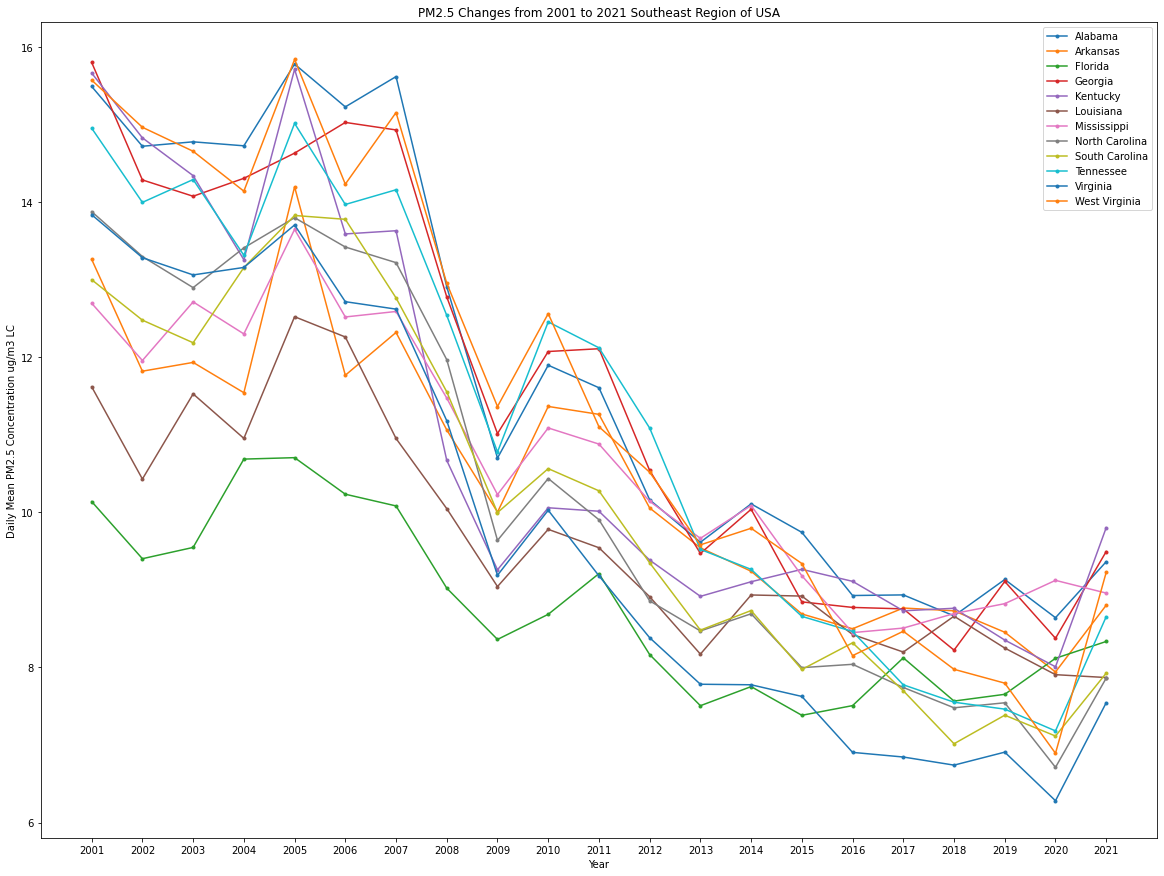

In [50]:
plt.figure(figsize = (20, 15))
plt.title('PM2.5 Changes from 2001 to 2021 Southeast Region of USA')
for state in df_SE_State:
    plt.plot(df_SE_State.index, df_SE_State[state], marker = '.', label = state)
    
plt.xlabel('Year')
plt.ylabel('Daily Mean PM2.5 Concentration ug/m3 LC')
plt.xticks(df_SE_State.index)
plt.legend()
plt.savefig('SoutheastRegion.png')
plt.show()

In [51]:
df_SE_State.agg(['mean', 'max', 'min', max_to_min])

STATE         Alabama   Arkansas    Florida    Georgia   Kentucky  Louisiana  \
mean        11.748237  10.439627   8.770278  11.553729  10.973184   9.662403   
max         15.776686  14.194478  10.703773  15.797567  15.709464  12.520566   
min          8.640868   7.941203   7.382776   8.222937   8.008488   7.869618   
max_to_min   7.135818   6.253275   3.320997   7.574630   7.700976   4.650948   

STATE       Mississippi  North Carolina  South Carolina  Tennessee   Virginia  \
mean          10.652486       10.249876       10.169436  11.104127   9.749271   
max           13.646058       13.875163       13.825331  15.012735  13.835372   
min            8.448619        6.712191        7.016106   7.181646   6.281577   
max_to_min     5.197440        7.162972        6.809225   7.831088   7.553795   

STATE       West Virginia  
mean            11.440835  
max             15.836378  
min              6.893124  
max_to_min       8.943254

#### Step3: display seasonal changes of each state

In [52]:
df_SE_Year = df_SE.groupby(['Year','Season','STATE'], as_index = False).mean()
df_SE_Year.head()

Year  Season     STATE       Site ID       POC  \
0  2001  Autumn   Alabama  1.074962e+07  1.973819   
1  2001  Autumn  Arkansas  5.091183e+07  1.099617   
2  2001  Autumn   Florida  1.206589e+08  1.413146   
3  2001  Autumn   Georgia  1.312924e+08  1.143685   
4  2001  Autumn  Kentucky  2.110043e+08  1.222222   

   Daily Mean PM2.5 Concentration  DAILY_AQI_VALUE  DAILY_OBS_COUNT  \
0                       15.698148        54.657088              1.0   
1                       12.416347        45.757344              1.0   
2                        8.269671        32.980751              1.0   
3                       15.048320        53.342990              1.0   
4                       13.887626        49.200758              1.0   

   PERCENT_COMPLETE  AQS_PARAMETER_CODE     CBSA_CODE  STATE_CODE  \
0             100.0        88282.038953  17222.754895         1.0   
1             100.0        88124.045977  29917.048666         5.0   
2             100.0        88190.989671  35258.469484        12.0   
3             100.0        88133.526072  17950.189155        13.0   
4             100.0        88149.099747  26863.933054        21.0   

   COUNTY_CODE  SITE_LATITUDE  SITE_LONGITUDE  
0    74.814815      33.274577      -86.892975  
1    91.137931      34.832918      -92.398157  
2    65.767606      27.878835      -81.771129  
3   129.190035      33.282714      -83.812492  
4   100.393939      37.897002      -85.448842

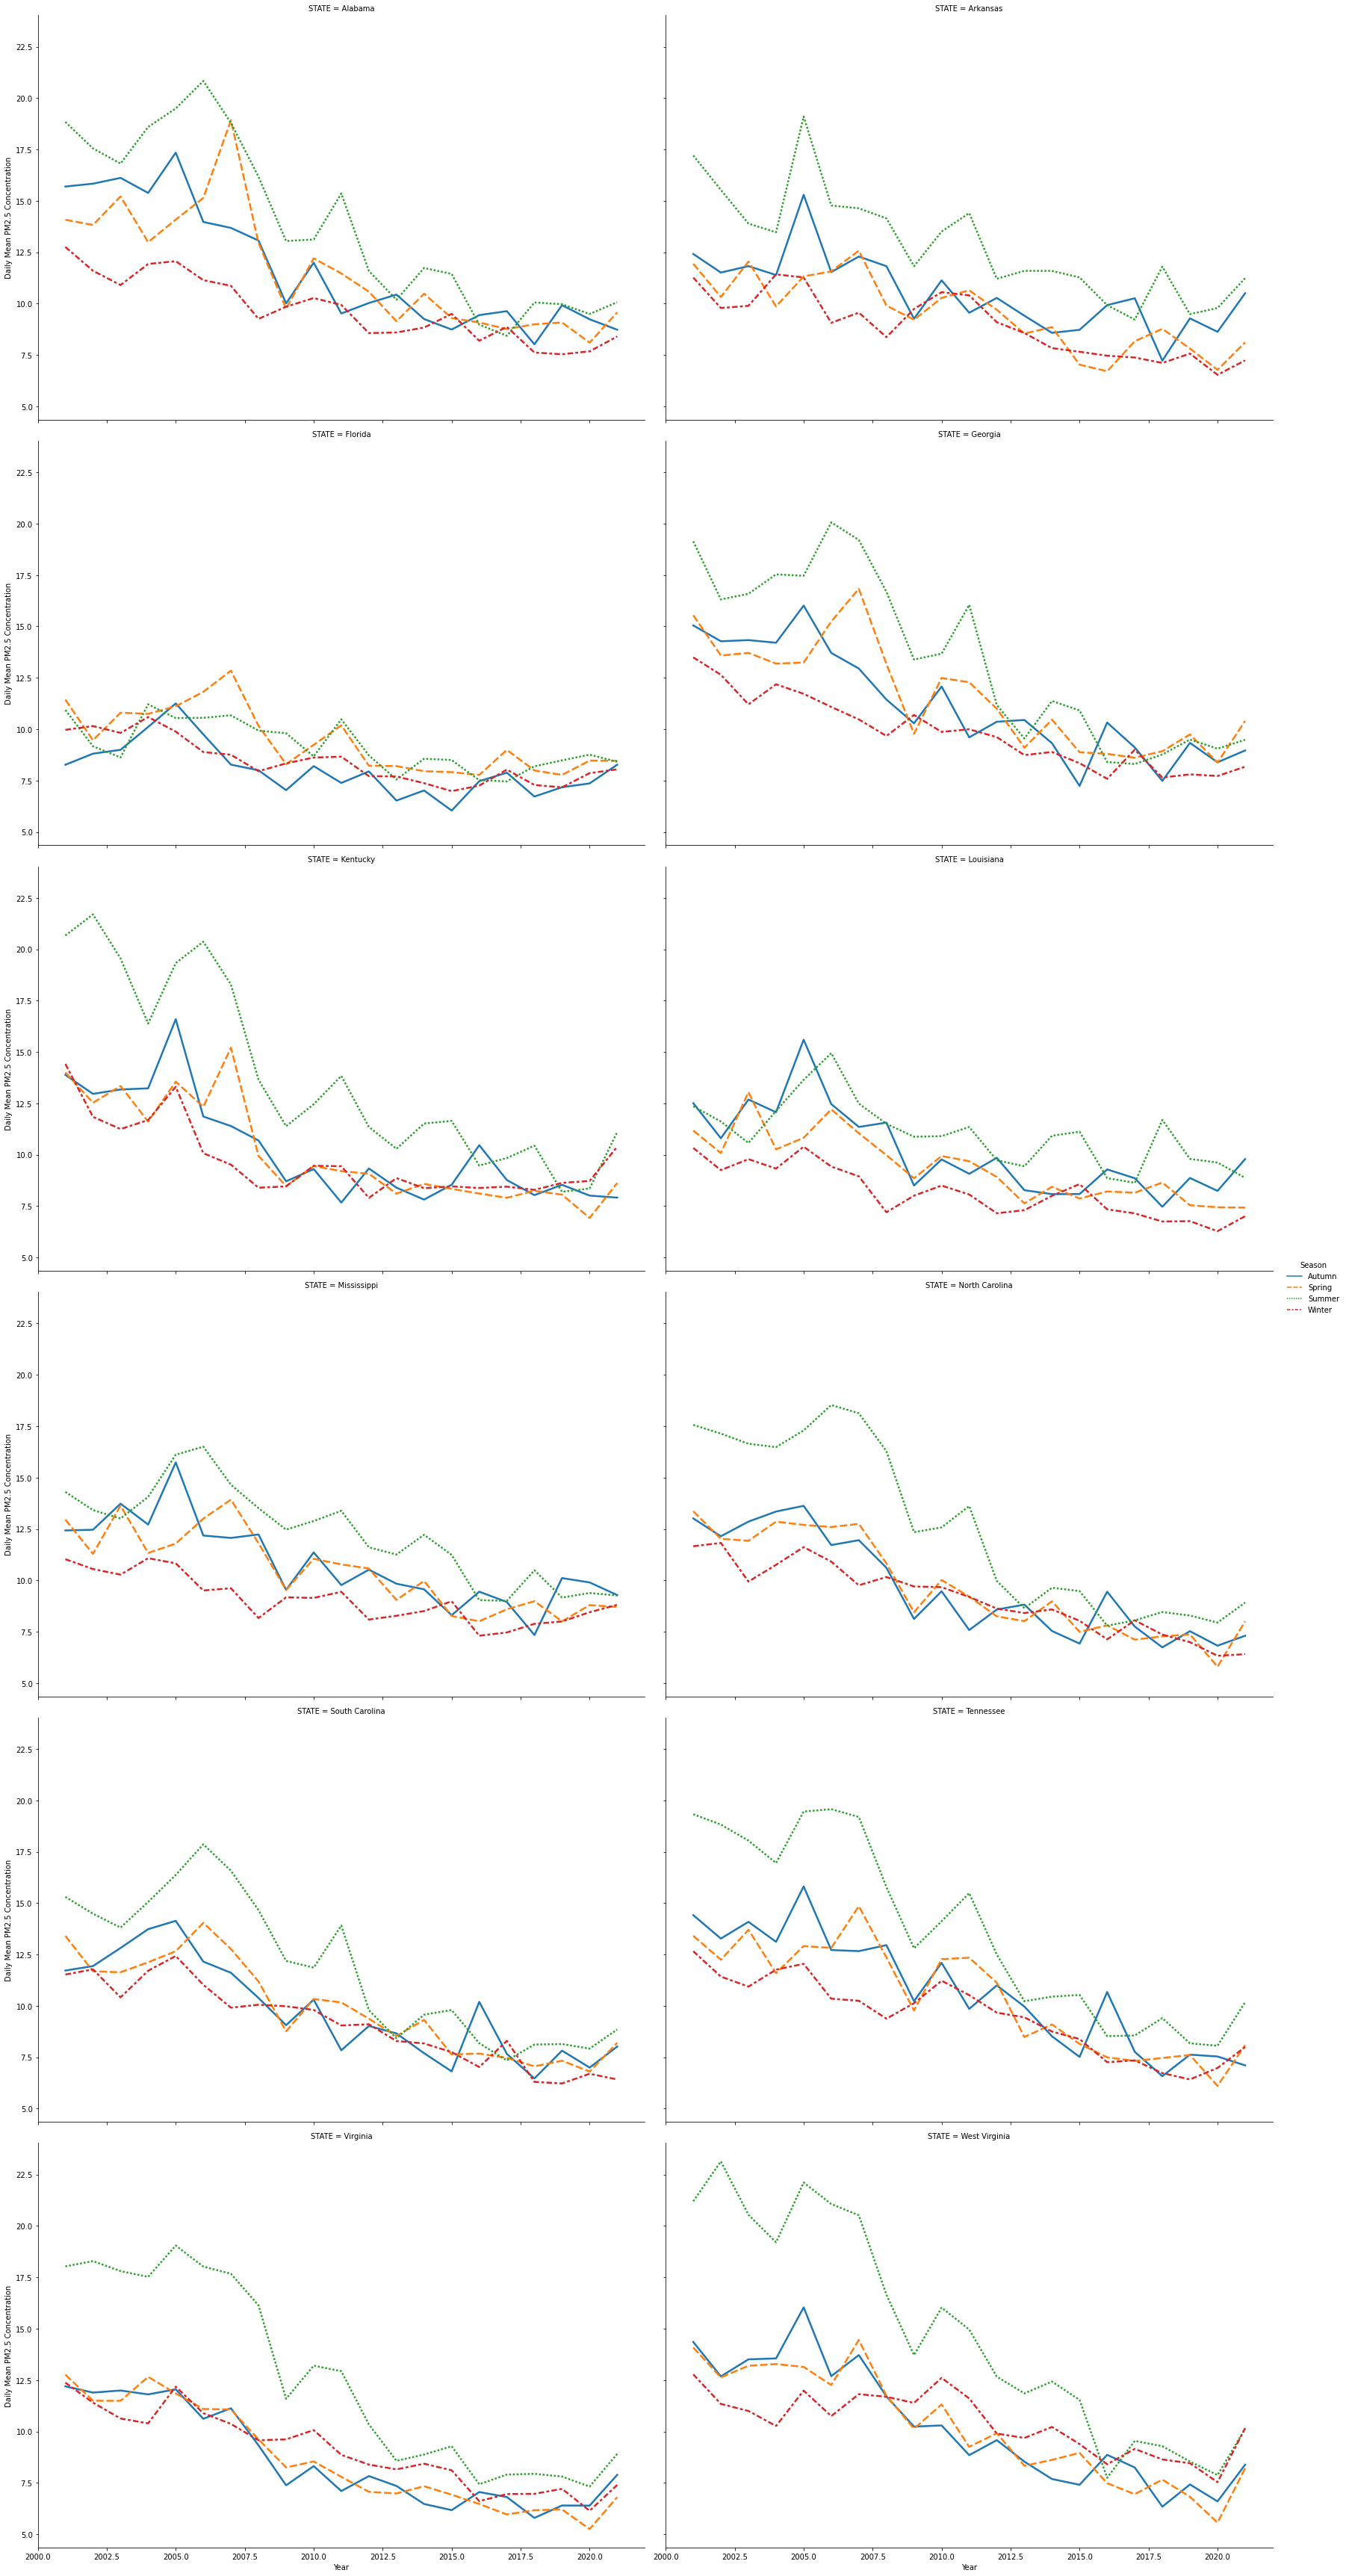

In [53]:
g = sn.relplot(x="Year", y="Daily Mean PM2.5 Concentration", hue="Season", style="Season",
            col="STATE", col_wrap=2,
            height=8, aspect=1.5, linewidth=2.5,
            kind="line", data= df_SE_Year)

#### Summary: Most states have highest PM2.5 concentration in Summers 

# Part6: Analyzing yearly and seasonal changes of Northeast Region

#### Step1: display the distribution of sites on the map

In [54]:
df_NE_map = df_NE.pivot_table(index = ['Site ID', 'SITE_LATITUDE', 'SITE_LONGITUDE'], columns = 'Year')['Daily Mean PM2.5 Concentration']
df_NE_map

Year                                         2001       2002       2003  \
Site ID   SITE_LATITUDE SITE_LONGITUDE                                    
90010010  41.170833     -73.194722      13.641341  13.207602  12.806250   
90010113  41.183708     -73.189835      12.773529  13.489565  12.267000   
90011123  41.399167     -73.443056      13.222609  13.095283  13.115596   
90012124  41.063153     -73.528456      13.006364  13.434615  13.514019   
90013005  41.112500     -73.407222      13.410811  13.183784  12.959259   
...                                           ...        ...        ...   
500070012 44.480278     -73.214444      10.053636  10.220056   9.481662   
500070014 44.476200     -73.210600            NaN        NaN   9.949123   
500210002 43.608056     -72.982778      11.959649  11.851327  11.396471   
500230005 44.197283     -72.502882      10.435965  11.208547        NaN   
500259000 42.956100     -72.909800            NaN        NaN        NaN   

Year                                         2004       2005       2006  \
Site ID   SITE_LATITUDE SITE_LONGITUDE                                    
90010010  41.170833     -73.194722      12.917647  14.321552  12.509322   
90010113  41.183708     -73.189835            NaN        NaN        NaN   
90011123  41.399167     -73.443056      11.254545  13.439048  12.170175   
90012124  41.063153     -73.528456      11.783333        NaN        NaN   
90013005  41.112500     -73.407222      11.790526  13.324771  11.769091   
...                                           ...        ...        ...   
500070012 44.480278     -73.214444       9.576246   9.621143   8.221067   
500070014 44.476200     -73.210600      10.056780   9.934821   9.216883   
500210002 43.608056     -72.982778      10.935514  11.863303  10.332773   
500230005 44.197283     -72.502882            NaN        NaN        NaN   
500259000 42.956100     -72.909800            NaN        NaN        NaN   

Year                                         2007       2008      2009  \
Site ID   SITE_LATITUDE SITE_LONGITUDE                                   
90010010  41.170833     -73.194722      12.681739  11.921101  9.381250   
90010113  41.183708     -73.189835            NaN        NaN       NaN   
90011123  41.399167     -73.443056      11.961667  11.704310  9.162393   
90012124  41.063153     -73.528456            NaN        NaN       NaN   
90013005  41.112500     -73.407222      11.944248  11.794595  9.424779   
...                                           ...        ...       ...   
500070012 44.480278     -73.214444       8.940390   7.754261  6.992244   
500070014 44.476200     -73.210600            NaN   8.056410  7.660967   
500210002 43.608056     -72.982778      10.923214  10.304237  9.678618   
500230005 44.197283     -72.502882            NaN        NaN       NaN   
500259000 42.956100     -72.909800            NaN        NaN       NaN   

Year                                        2010  ...       2012       2013  \
Site ID   SITE_LATITUDE SITE_LONGITUDE            ...                         
90010010  41.170833     -73.194722      8.747368  ...   8.287442  10.616456   
90010113  41.183708     -73.189835           NaN  ...        NaN        NaN   
90011123  41.399167     -73.443056      9.161345  ...   8.271922   9.820332   
90012124  41.063153     -73.528456           NaN  ...        NaN        NaN   
90013005  41.112500     -73.407222      8.912844  ...   8.556637        NaN   
...                                          ...  ...        ...        ...   
500070012 44.480278     -73.214444      7.121598  ...   6.884326   6.234395   
500070014 44.476200     -73.210600      7.258611  ...        NaN   6.432110   
500210002 43.608056     -72.982778      9.585646  ...  10.224176   9.603263   
500230005 44.197283     -72.502882           NaN  ...        NaN        NaN   
500259000 42.956100     -72.909800           NaN  ...   3.857522   3.459322   

Year                                        2014      201

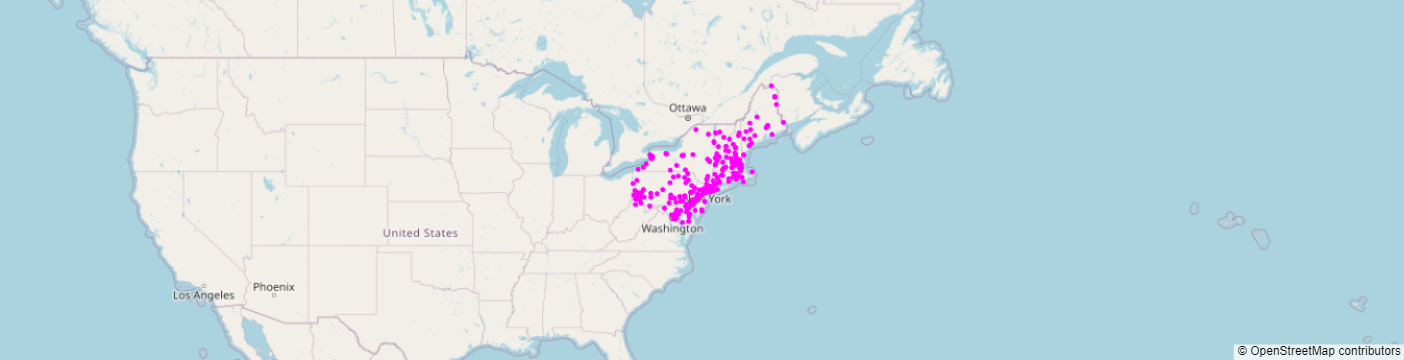

In [55]:
import pandas as pd
lat = list(df_NE_map.index.get_level_values(1))
lon = list(df_NE_map.index.get_level_values(2))
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")
names = list(df_NE_map.index.get_level_values(0))
import plotly.express as px

fig = px.scatter_mapbox(us_cities, lat= lat, lon=lon, hover_name= names,
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### Step2: compare all states of northeast region in a single graph

In [56]:
df_NE_State = df_NE.groupby(['Year','STATE']).mean()
df_NE_State.head()

Site ID       POC  Daily Mean PM2.5 Concentration  \
Year STATE                                                                   
2001 Connecticut    9.005344e+07  1.109808                       13.721023   
     Delaware       1.000290e+08  1.304406                       15.992924   
     Maine          2.301165e+08  1.000000                        6.254930   
     Maryland       2.421428e+08  1.271086                       15.449787   
     Massachusetts  2.501851e+08  1.556958                       12.407420   

                    DAILY_AQI_VALUE  DAILY_OBS_COUNT  PERCENT_COMPLETE  \
Year STATE                                                               
2001 Connecticut          49.282027              1.0             100.0   
     Delaware             55.657543              1.0             100.0   
     Maine                24.589789              1.0             100.0   
     Maryland             54.258943              1.0             100.0   
     Massachusetts        45.687192              1.0             100.0   

                    AQS_PARAMETER_CODE     CBSA_CODE  STATE_CODE  COUNTY_CODE  \
Year STATE                                                                      
2001 Connecticut          88107.021586  26736.640075         9.0     5.164242   
     Delaware             88118.935247  34951.748999        10.0     2.791722   
     Maine                88502.000000  33277.021277        23.0    11.429577   
     Maryland             88118.503446  18811.545783        24.0   214.176895   
     Massachusetts        88170.384852  29665.665025        25.0    18.435345   

                    SITE_LATITUDE  SITE_LONGITUDE  
Year STATE                                         
2001 Connecticut        41.398254      -72.973172  
     Delaware           39.502607      -75.623297  
     Maine              44.849314      -68.758530  
     Maryland           39.248190      -76.642163  
     Massachusetts      42.253566      -71.606126

In [57]:
df_NE_State = df_NE_State.pivot_table(index='Year', columns= 'STATE')['Daily Mean PM2.5 Concentration']
df_NE_State.head()

STATE  Connecticut   Delaware     Maine   Maryland  Massachusetts  \
Year                                                                
2001     13.721023  15.992924  6.254930  15.449787      12.407420   
2002     13.110023  14.856291  6.064212  15.253661      12.022134   
2003     12.893202  14.171150  5.927077  14.274836      11.639889   
2004     12.020873  13.945365  5.296528  14.717092      11.221322   
2005     12.831555  14.440098  5.300427  15.169305      10.593236   

STATE  New Hampshire  New Jersey   New York  Pennsylvania  Rhode Island  \
Year                                                                      
2001        9.590650   13.733478  13.121929     15.817723     11.567436   
2002        9.376918   13.523175  12.562838     14.806917     10.556278   
2003        8.972934   13.786984  12.354574     14.868176     11.111121   
2004        8.705725   12.535280  11.644361     14.124050     10.572486   
2005        9.284451   13.867134  12.704150     15.255438     10.624488   

STATE   Vermont  
Year             
2001   9.481527  
2002   9.737447  
2003   8.346852  
2004   8.524372  
2005   8.779097

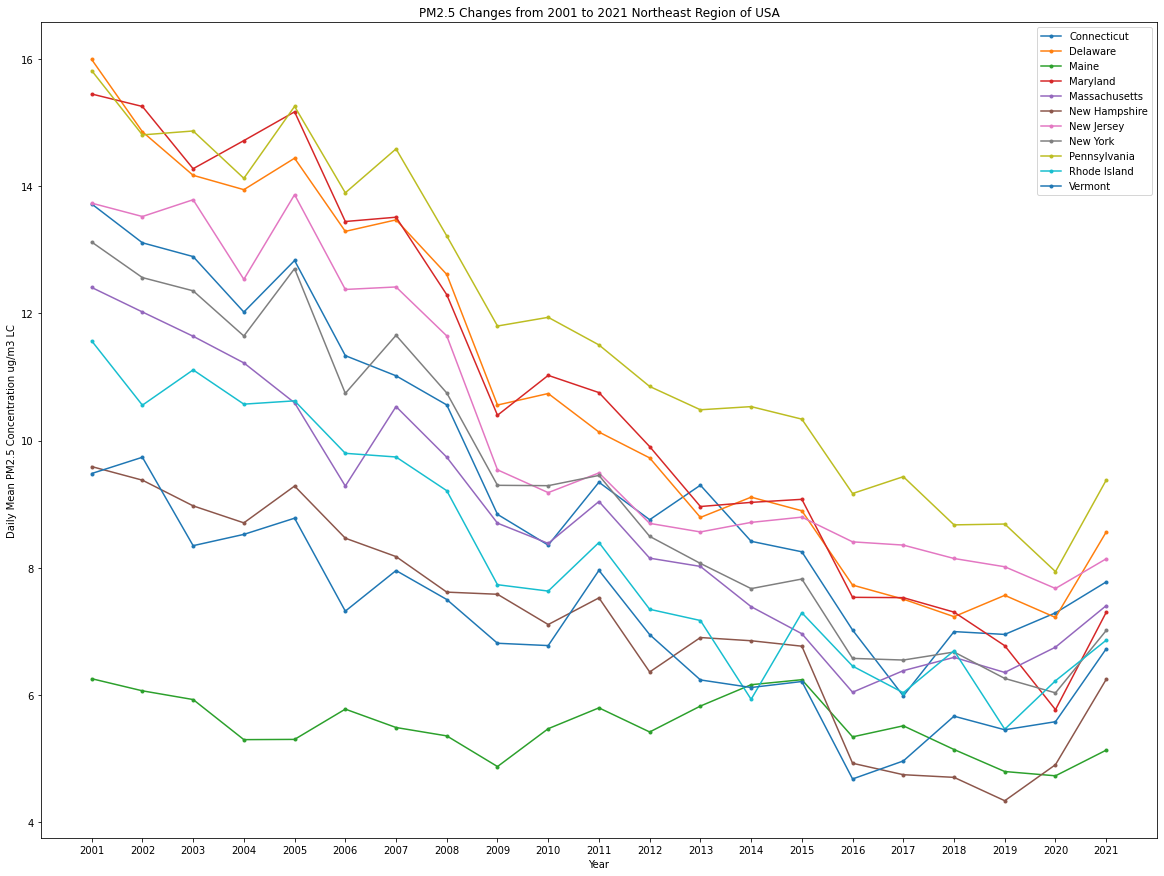

In [58]:
plt.figure(figsize = (20, 15))
plt.title('PM2.5 Changes from 2001 to 2021 Northeast Region of USA')
for state in df_NE_State:
    plt.plot(df_NE_State.index, df_NE_State[state], marker = '.', label = state)
    
plt.xlabel('Year')
plt.ylabel('Daily Mean PM2.5 Concentration ug/m3 LC')
plt.xticks(df_SE_State.index)
plt.legend()
plt.savefig('NortheastRegion.png')
plt.show()

In [59]:
df_NE_State.agg(['mean', 'max', 'min', max_to_min])

STATE       Connecticut   Delaware     Maine   Maryland  Massachusetts  \
mean           9.560364  10.787764  5.518663  10.736650       8.743271   
max           13.721023  15.992924  6.254930  15.449787      12.407420   
min            5.984199   7.218023  4.727775   5.767494       6.042034   
max_to_min     7.736824   8.774901  1.527155   9.682293       6.365386   

STATE       New Hampshire  New Jersey   New York  Pennsylvania  Rhode Island  \
mean             7.101899   10.266751   9.272754     11.776101      8.210024   
max              9.590650   13.867134  13.121929     15.817723     11.567436   
min              4.335774    7.673942   6.032124      7.939084      5.460079   
max_to_min       5.254875    6.193193   7.089805      7.878639      6.107357   

STATE        Vermont  
mean        7.036206  
max         9.737447  
min         4.678255  
max_to_min  5.059192

#### Step3: display seasonal changes of each state

In [60]:
df_NE_Year = df_NE.groupby(['Year','Season','STATE'], as_index = False).mean()
df_NE_Year.head()

Year  Season          STATE       Site ID       POC  \
0  2001  Autumn    Connecticut  9.005282e+07  1.107468   
1  2001  Autumn       Delaware  1.000286e+08  1.421995   
2  2001  Autumn          Maine  2.301166e+08  1.000000   
3  2001  Autumn       Maryland  2.421554e+08  1.228916   
4  2001  Autumn  Massachusetts  2.501828e+08  1.324631   

   Daily Mean PM2.5 Concentration  DAILY_AQI_VALUE  DAILY_OBS_COUNT  \
0                       12.655373        46.477231              1.0   
1                       12.960614        47.258312              1.0   
2                        5.616022        22.270718              1.0   
3                       12.742436        46.799197              1.0   
4                       11.116913        41.710556              1.0   

   PERCENT_COMPLETE  AQS_PARAMETER_CODE     CBSA_CODE  STATE_CODE  \
0             100.0        88117.069217  26995.081967         9.0   
1             100.0        88131.767263  34640.562660        10.0   
2             100.0        88502.000000  30899.550562        23.0   
3             100.0        88118.178046  18317.831325        24.0   
4             100.0        88142.419977  30145.947787        25.0   

   COUNTY_CODE  SITE_LATITUDE  SITE_LONGITUDE  
0     5.098361      41.399075      -72.994076  
1     2.749361      39.497924      -75.622034  
2    11.408840      44.841949      -68.845716  
3   215.432396      39.256206      -76.636750  
4    18.209989      42.266031      -71.608482

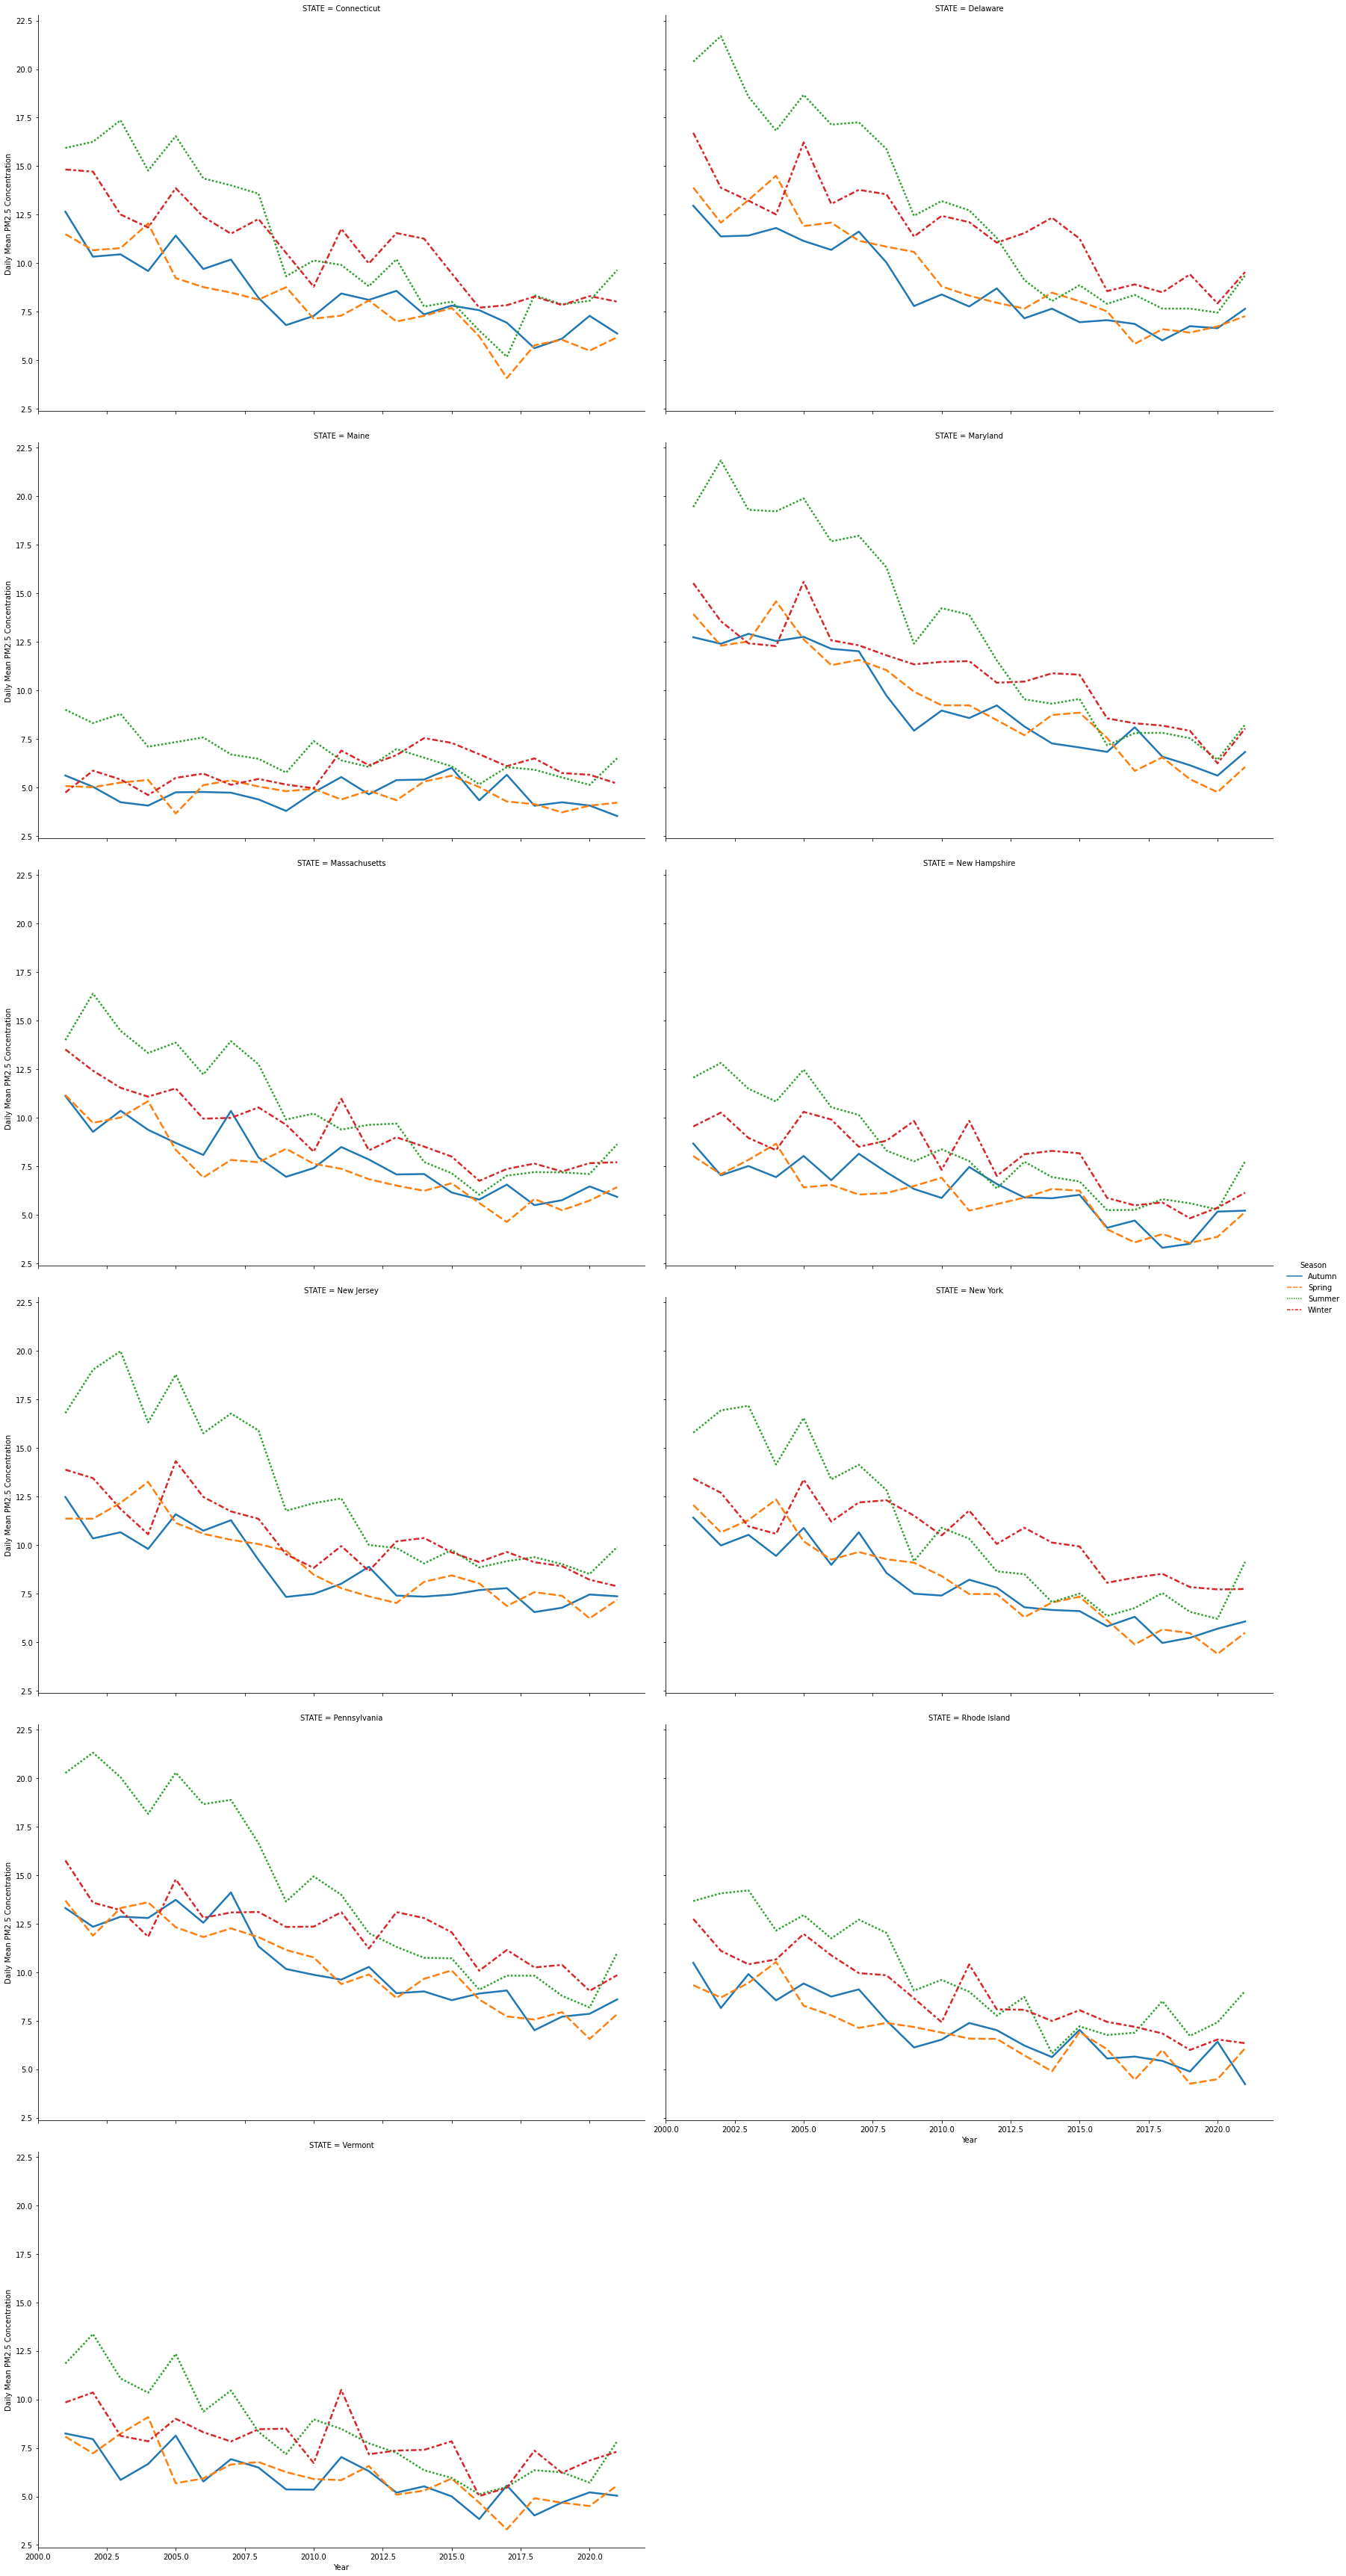

In [61]:
g = sn.relplot(x="Year", y="Daily Mean PM2.5 Concentration", hue="Season", style="Season",
            col="STATE", col_wrap=2,
            height=8, aspect=1.5, linewidth=2.5,
            kind="line", data= df_NE_Year)

#### Summary: From 2001 to 2010, most states in Northwest region had highest PM2.5 concentration in summers but after 2010, it is winters that had the highest values in most states

# Part7: Compare 5 regions in a single graph

In [65]:
df_region = df_total.groupby(['Year', 'Region'], as_index = False).mean()
df_region.head()

Year     Region       Site ID       POC  Daily Mean PM2.5 Concentration  \
0  2001    Midwest  3.013941e+08  1.239148                       13.565040   
1  2001  Northeast  3.233465e+08  1.333128                       13.781507   
2  2001  Southeast  2.614429e+08  1.315533                       13.442391   
3  2001  Southwest  3.812618e+08  1.556027                        9.561667   
4  2001       West  2.776238e+08  1.387610                       10.310639   

   DAILY_AQI_VALUE  DAILY_OBS_COUNT  PERCENT_COMPLETE  AQS_PARAMETER_CODE  \
0        48.666255              1.0             100.0        88134.088843   
1        49.117506              1.0             100.0        88144.264761   
2        49.168865              1.0             100.0        88163.827052   
3        37.003292              1.0             100.0        88180.614150   
4        37.366397              1.0             100.0        88211.028392   

      CBSA_CODE  STATE_CODE  COUNTY_CODE  SITE_LATITUDE  SITE_LONGITUDE  
0  27846.773061   30.032826   106.530500      41.609465      -88.883672  
1  30492.115129   32.281033    53.529847      41.190214      -74.907843  
2  28281.928030   26.044933    99.300843      33.523108      -84.525045  
3  27206.836156   37.995897   130.122289      32.657664     -101.601752  
4  33435.430806   27.716337    45.918188      41.562365     -119.207139

In [67]:
df_region = df_region.pivot_table(index='Year', columns= 'Region')['Daily Mean PM2.5 Concentration']
df_region.head()

Region    Midwest  Northeast  Southeast  Southwest       West
Year                                                         
2001    13.565040  13.781507  13.442391   9.561667  10.310639
2002    12.940508  13.145201  12.659163   9.483977  10.826629
2003    12.662424  12.940747  12.723268   9.443390   9.519757
2004    11.498828  12.356832  12.731592   8.402749   9.426055
2005    13.247477  12.955656  13.659913   9.812771   8.881865

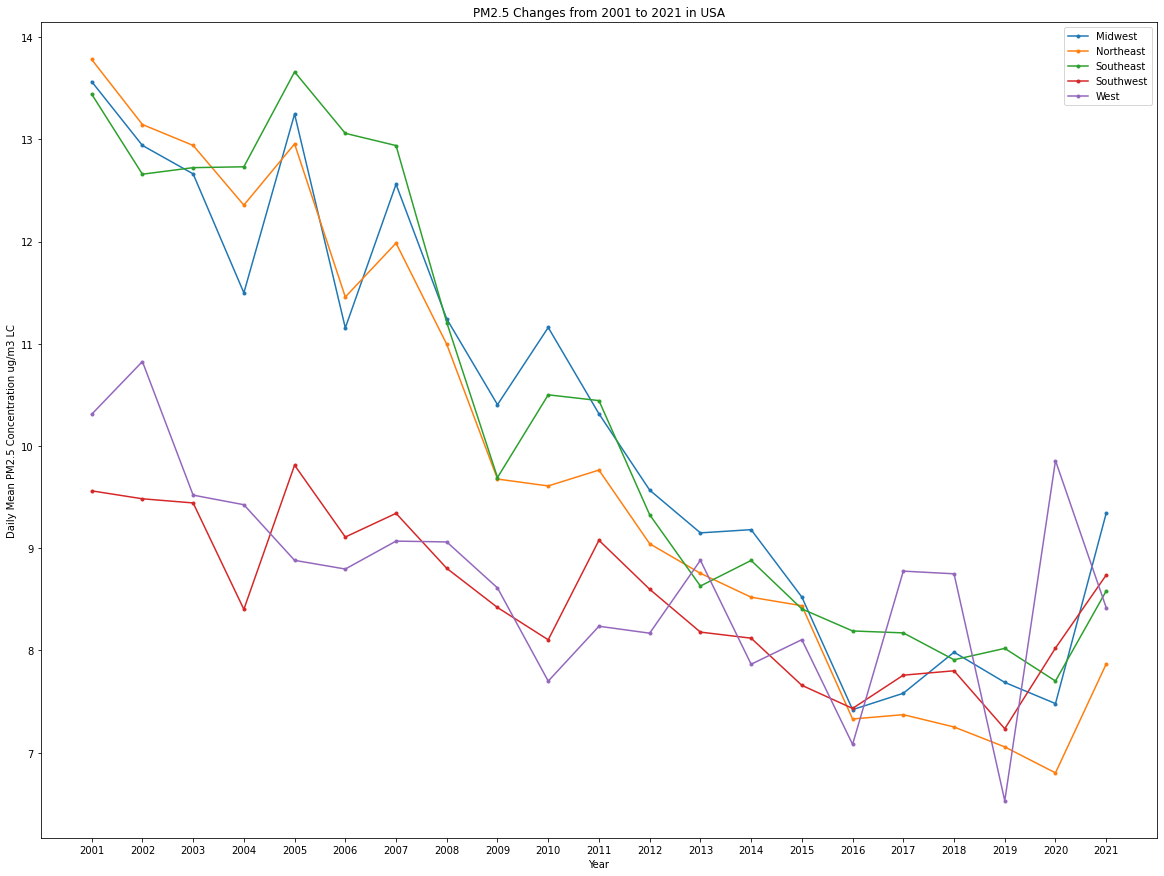

In [68]:
plt.figure(figsize = (20, 15))
plt.title('PM2.5 Changes from 2001 to 2021 in USA')
for region in df_region:
    plt.plot(df_region.index, df_region[region], marker = '.', label = region)
    
plt.xlabel('Year')
plt.ylabel('Daily Mean PM2.5 Concentration ug/m3 LC')
plt.xticks(df_region.index)
plt.legend()
plt.savefig('AllRegion.png')
plt.show()

In [69]:
df_region.agg(['mean', 'max', 'min', max_to_min])

Region        Midwest  Northeast  Southeast  Southwest       West
mean        10.222660   9.862367  10.327729   8.529117   8.708622
max         13.565040  13.781507  13.659913   9.812771  10.826629
min          7.421206   6.802688   7.701139   7.234436   6.530267
max_to_min   6.143835   6.978819   5.958774   2.578335   4.296363

In [70]:
df_region_Year = df_total.groupby(['Year','Season','Region'], as_index = False).mean()
df_region_Year.head()

Year  Season     Region       Site ID       POC  \
0  2001  Autumn    Midwest  3.017996e+08  1.291411   
1  2001  Autumn  Northeast  3.220413e+08  1.332348   
2  2001  Autumn  Southeast  2.550771e+08  1.386492   
3  2001  Autumn  Southwest  3.765918e+08  1.552891   
4  2001  Autumn       West  2.764878e+08  1.406669   

   Daily Mean PM2.5 Concentration  DAILY_AQI_VALUE  DAILY_OBS_COUNT  \
0                       11.425154        42.277614              1.0   
1                       11.852981        43.714954              1.0   
2                       12.695091        46.237256              1.0   
3                        9.483426        36.491140              1.0   
4                       10.965486        39.430429              1.0   

   PERCENT_COMPLETE  AQS_PARAMETER_CODE     CBSA_CODE  STATE_CODE  \
0             100.0        88141.008917  27915.241355   30.074030   
1             100.0        88148.321754  30624.863230   32.152254   
2             100.0        88175.004292  27907.312053   25.409307   
3             100.0        88185.047074  27432.379535   37.529980   
4             100.0        88213.828262  33317.471478   27.603001   

   COUNTY_CODE  SITE_LATITUDE  SITE_LONGITUDE  
0   105.871793      41.617286      -88.933538  
1    51.786770      41.213529      -74.761257  
2    98.342971      33.511626      -84.605441  
3   129.043673      32.745768     -101.836942  
4    45.653439      41.505992     -119.253067

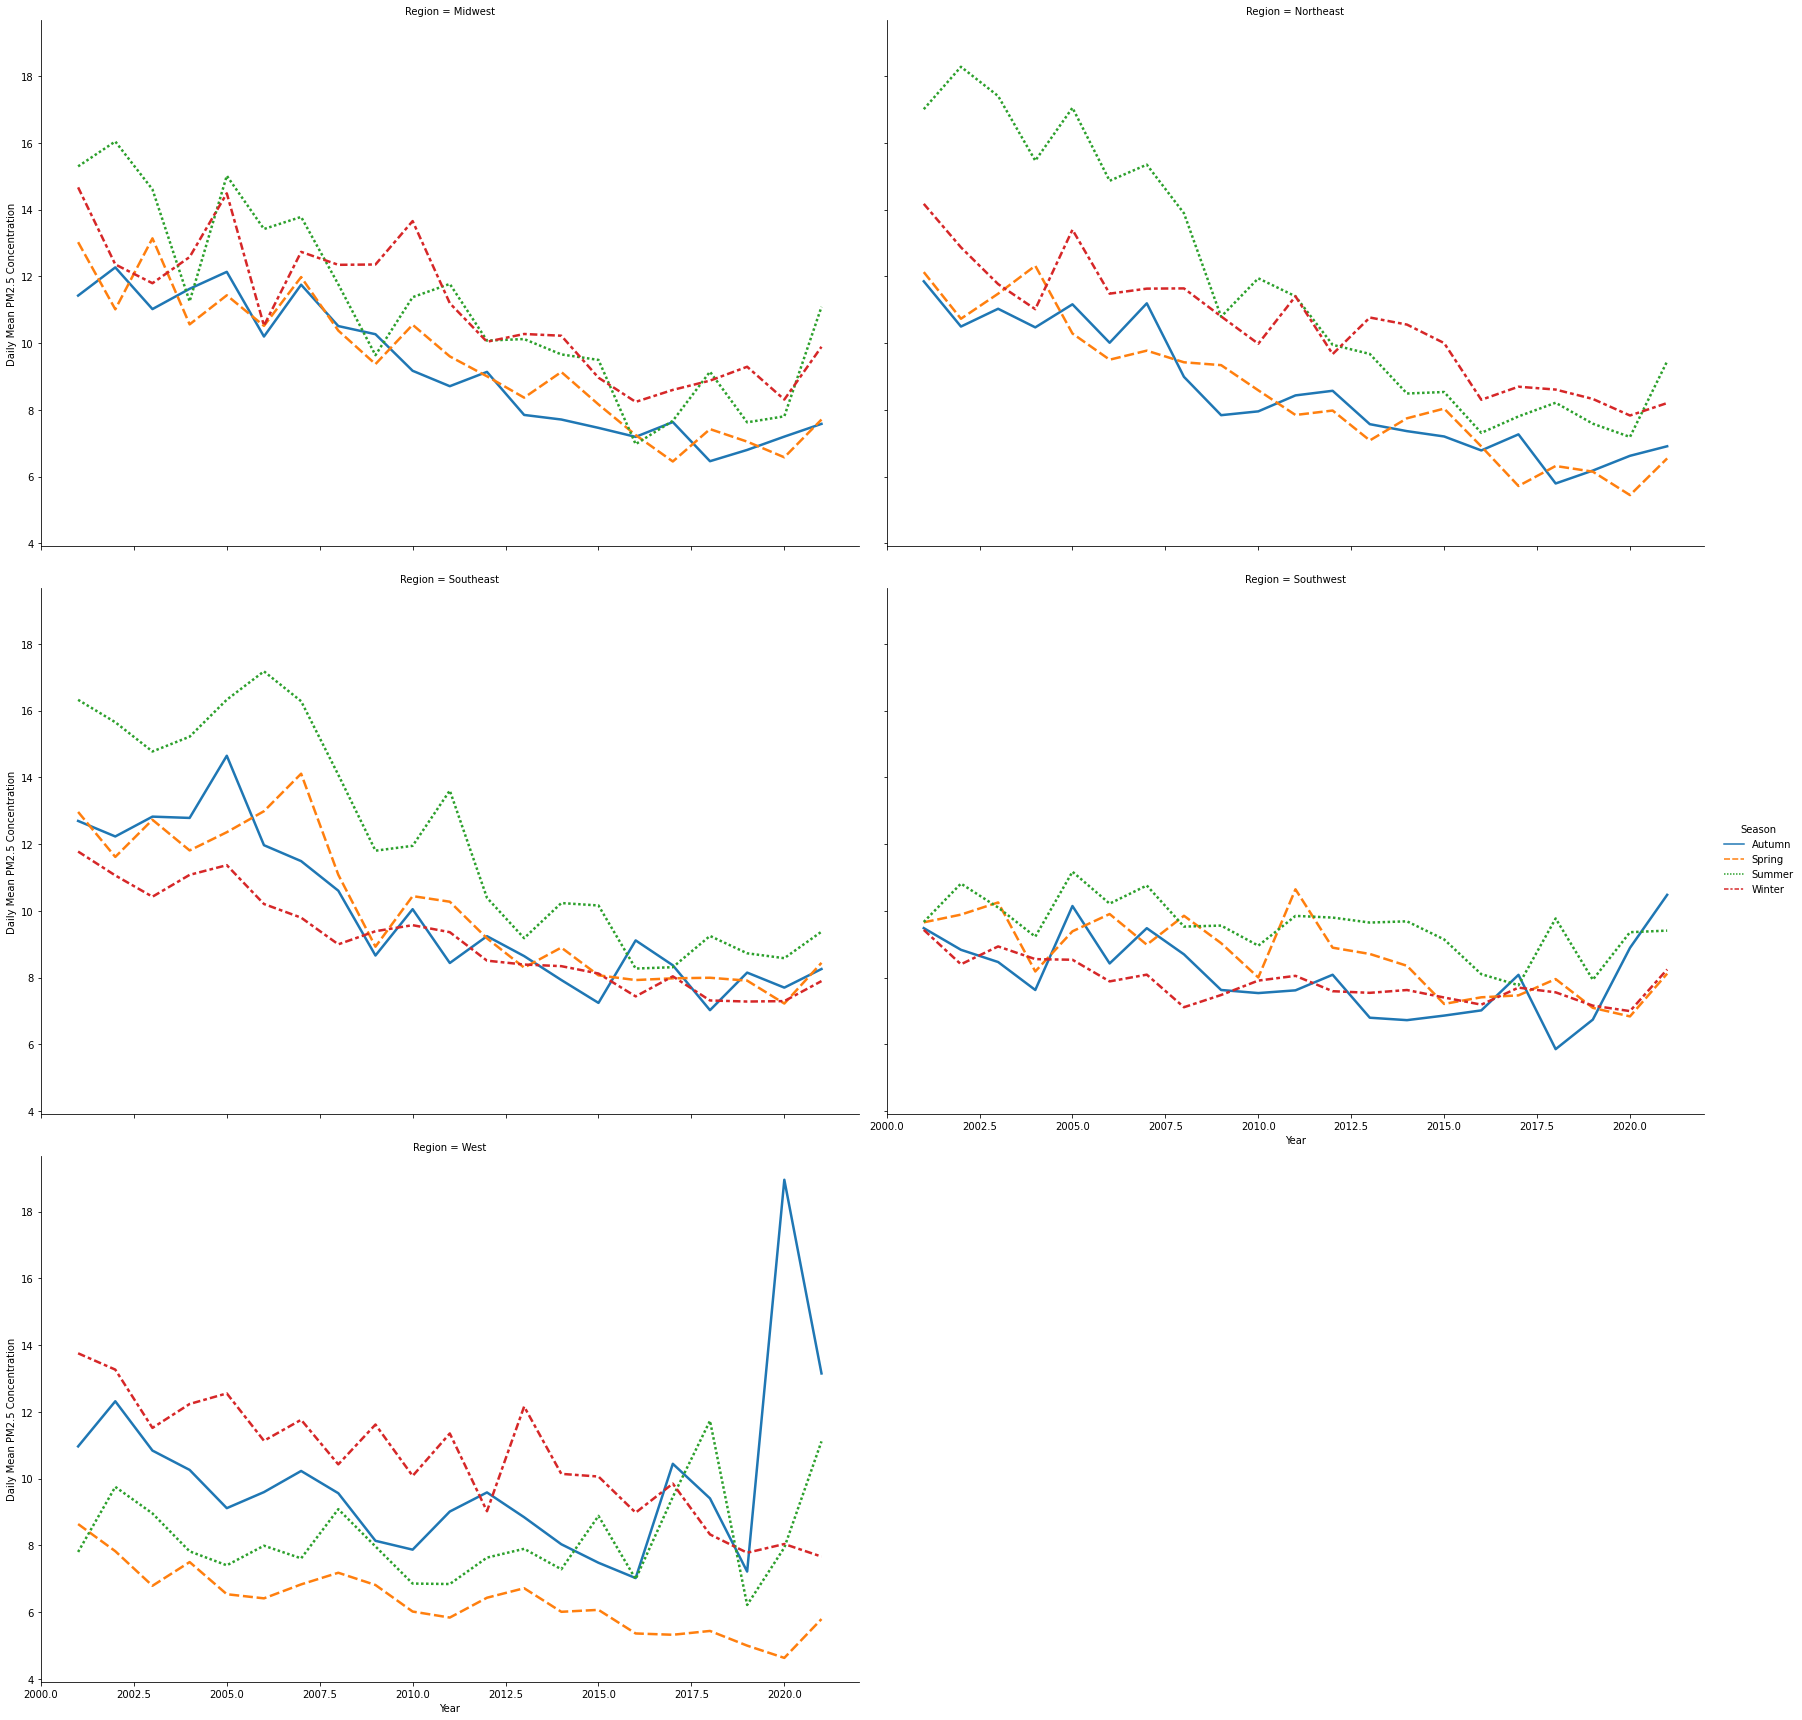

In [71]:
g = sn.relplot(x="Year", y="Daily Mean PM2.5 Concentration", hue="Season", style="Season",
            col="Region", col_wrap=2,
            height=8, aspect=1.5, linewidth=2.5,
            kind="line", data= df_region_Year)

https://learn.kaiterra.com/en/air-academy/california-wildfires-2020-wildfire-pm2.5

In [72]:
df_total.to_parquet(“PM2.5_2001-2021.parquet”)

SyntaxError: invalid character in identifier (487870015.py, line 1)

In [74]:
df_total.to_parquet(“PM25_2001_2021.parquet”)

SyntaxError: invalid character in identifier (463764860.py, line 1)

In [90]:
df_2 = df_total.groupby(['STATE_CODE','COUNTY_CODE', 'Season'],as_index = False).mean()

In [91]:
df_2.head()

STATE_CODE  COUNTY_CODE  Season     Site ID  POC  \
0           1            3  Autumn  10030010.0  1.0   
1           1            3  Spring  10030010.0  1.0   
2           1            3  Summer  10030010.0  1.0   
3           1            3  Winter  10030010.0  1.0   
4           1            5  Autumn  10050002.0  5.0   

   Daily Mean PM2.5 Concentration  DAILY_AQI_VALUE  DAILY_OBS_COUNT  \
0                        9.677316        38.362949              1.0   
1                        9.374749        37.491639              1.0   
2                       10.577990        41.351820              1.0   
3                        7.944484        32.503559              1.0   
4                       14.167500        51.250000              1.0   

   PERCENT_COMPLETE  AQS_PARAMETER_CODE  CBSA_CODE  SITE_LATITUDE  \
0             100.0             88101.0    19300.0      30.497478   
1             100.0             88101.0    19300.0      30.497478   
2             100.0             88101.0    19300.0      30.497478   
3             100.0             88101.0    19300.0      30.497478   
4             100.0             88502.0    21640.0      31.664302   

   SITE_LONGITUDE         Year  
0      -87.880258  2010.557656  
1      -87.880258  2011.025084  
2      -87.880258  2010.771231  
3      -87.880258  2010.868327  
4      -85.606175  2004.125000

In [ ]:
import fastparquet

In [ ]:
df_2.to_parquet("PM25.parquet")

In [ ]:
pip install 